In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from helpers import load_dataset_paths, compute_average_signal, load_preprocessed_signal
import pywt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from CNN_classifier import Multichannel_1DCNN
from preprocessing import preprocess_signal, preprocess_save_all

# 0. Preprocess and Save all Signals 

In [7]:
BASE_DIR = "MATLAB_prep/Labelled_VEP_Data"
DEVICES = ["PRIMA", "MP20"]
LABELS = ["BC_Only", "RGC_Only", "BC_and_RGC"]
OUTPUT_DIR = "Preprocessed_VEP_Data"
TMAX = 200
DELAY = 0

all_paths_raw = load_dataset_paths(base_dir=BASE_DIR, devices=DEVICES, labels=LABELS)

prima_files_BC_raw = all_paths_raw["PRIMA"]["BC_Only"]
prima_files_RGC_raw = all_paths_raw["PRIMA"]["RGC_Only"]
prima_files_BC_and_RGC_raw = all_paths_raw["PRIMA"]["BC_and_RGC"]
mp20_files_BC_raw = all_paths_raw["MP20"]["BC_Only"]
mp20_files_RGC_raw = all_paths_raw["MP20"]["RGC_Only"]
mp20_files_BC_and_RGC_raw = all_paths_raw["MP20"]["BC_and_RGC"]

preprocess_save_all(BASE_DIR=BASE_DIR, OUTPUT_DIR=OUTPUT_DIR, DEVICES=DEVICES, LABELS=LABELS, normalize=True, tmax=TMAX, delay=DELAY)

# 1. Loading preprocessed files

In [8]:
all_paths = load_dataset_paths(base_dir=OUTPUT_DIR, devices=DEVICES, labels=LABELS)

# Example usage:

prima_files_BC_only = all_paths["PRIMA"]["BC_Only"]
prima_files_RGC_only = all_paths["PRIMA"]["RGC_Only"]
prima_files_BC_and_RGC = all_paths["PRIMA"]["BC_and_RGC"]

mp20_files_BC_only = all_paths["MP20"]["BC_Only"]
mp20_files_RGC_only = all_paths["MP20"]["RGC_Only"]
mp20_files_BC_and_RGC = all_paths["MP20"]["BC_and_RGC"]

# print how many files are in each category
print(f"PRIMA BC_Only files: {len(prima_files_BC_only)}")
print(f"PRIMA RGC_Only files: {len(prima_files_RGC_only)}")
print(f"PRIMA BC_and_RGC files: {len(prima_files_BC_and_RGC)}")

print(f"MP20 BC_Only files: {len(mp20_files_BC_only)}")
print(f"MP20 RGC_Only files: {len(mp20_files_RGC_only)}")
print(f"MP20 BC_and_RGC files: {len(mp20_files_BC_and_RGC)}")

PRIMA BC_Only files: 145
PRIMA RGC_Only files: 66
PRIMA BC_and_RGC files: 39
MP20 BC_Only files: 42
MP20 RGC_Only files: 33
MP20 BC_and_RGC files: 18


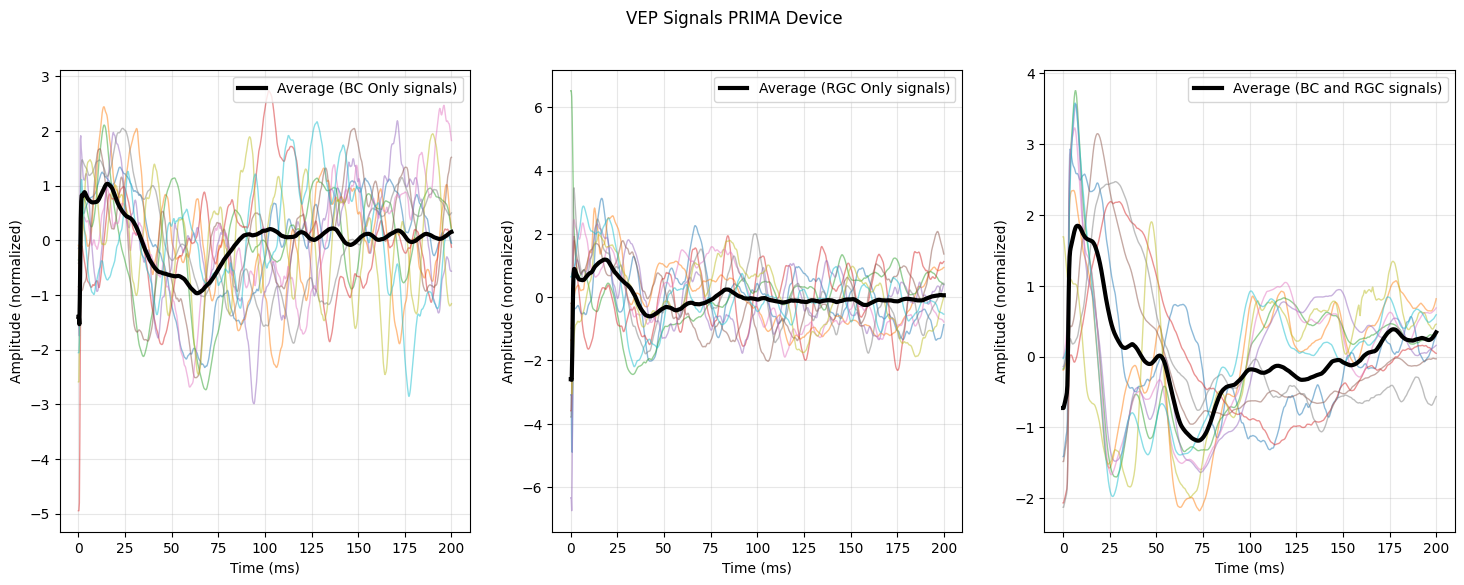

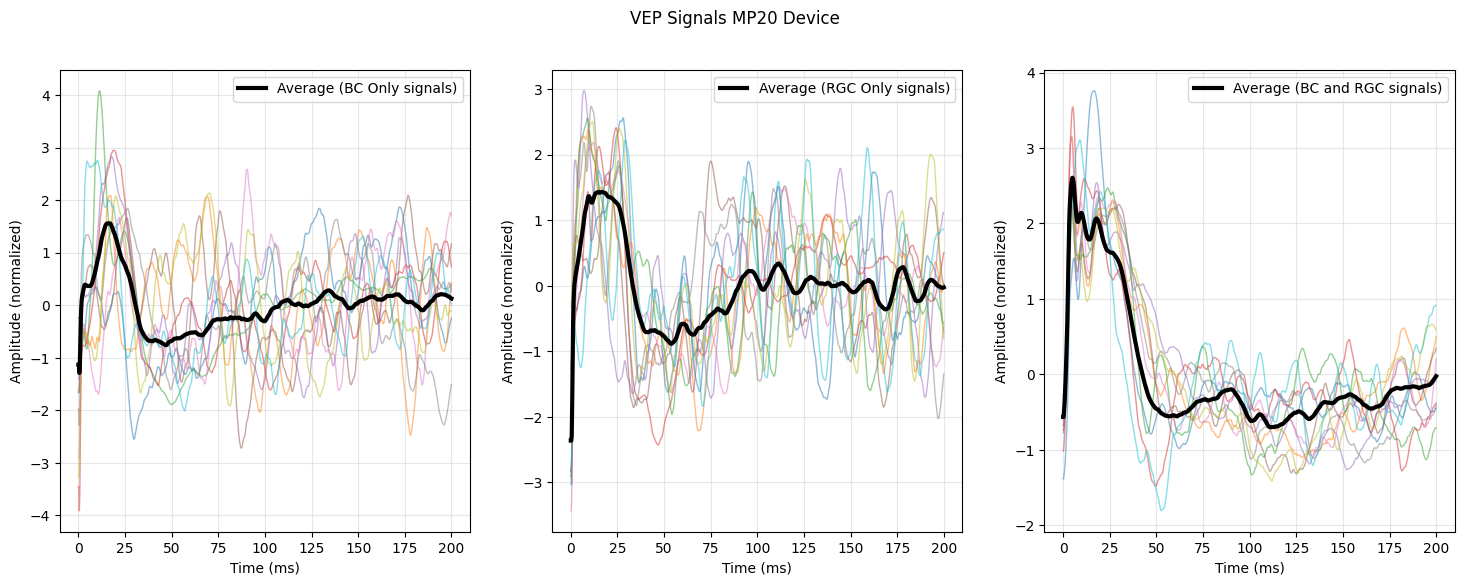

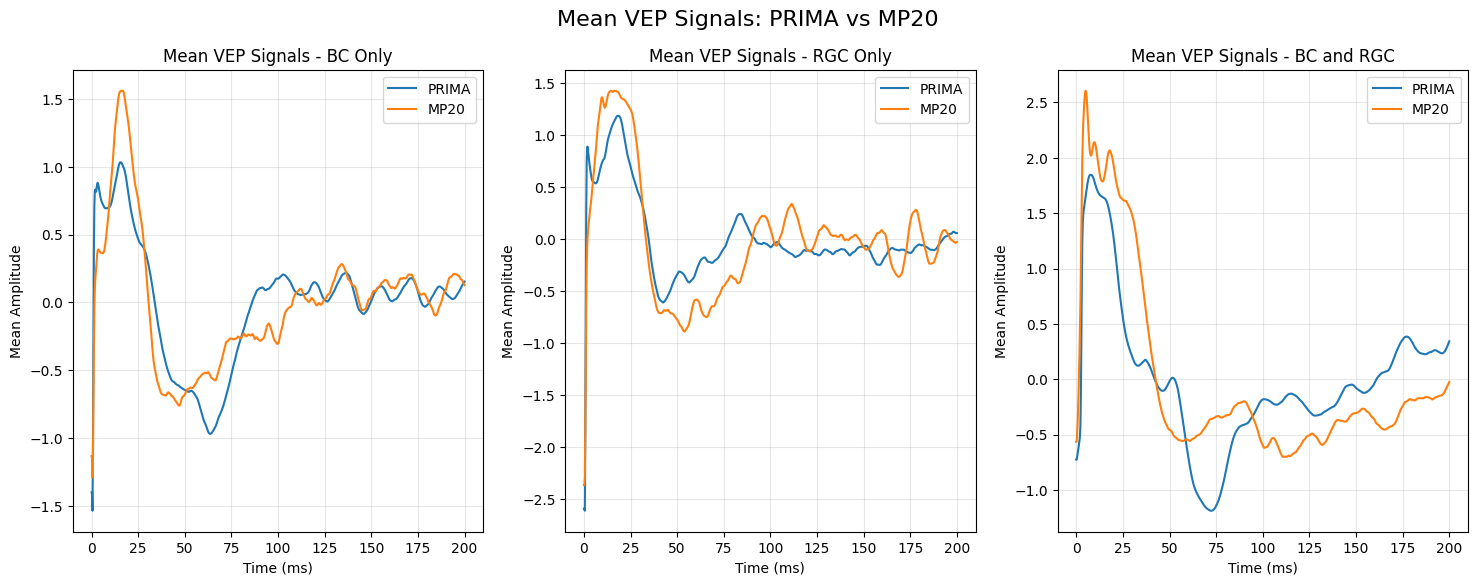

In [9]:
TMAX = 300
def compute_average_for_files(file_list):
    signals = []
    for file in file_list:
        time, signal = load_preprocessed_signal(file)
        signals.append(signal)
    avg_sig = np.mean(signals, axis=0)
    avg_t = time
    return avg_t, avg_sig

avg_BC_t, avg_BC_sig = compute_average_for_files(prima_files_BC_only)
avg_RGC_t, avg_RGC_sig = compute_average_for_files(prima_files_RGC_only)
avg_BC_RGC_t, avg_BC_RGC_sig = compute_average_for_files(prima_files_BC_and_RGC)

# --- Choose 3 example files per category ---
example_files_BC = prima_files_BC_only[:10]
example_files_RGC = prima_files_RGC_only[:10]
example_files_BC_and_RGC = prima_files_BC_and_RGC[:10]

categories = [
    (example_files_BC, "BC Only", avg_BC_t, avg_BC_sig),
    (example_files_RGC, "RGC Only", avg_RGC_t, avg_RGC_sig),
    (example_files_BC_and_RGC, "BC and RGC", avg_BC_RGC_t, avg_BC_RGC_sig)
]

# --- Plot ---
plt.figure(figsize=(18, 6))
plt.suptitle("VEP Signals PRIMA Device")
for i, (file_list, title, avg_t, avg_sig) in enumerate(categories, 1):
    plt.subplot(1, 3, i)

    # Plot some example signals
    for file in file_list:
        time, signal = load_preprocessed_signal(file)
        plt.plot(time, signal, alpha=0.5, lw=1)

    # Plot the class-wide average in black
    plt.plot(avg_t, avg_sig, color="k", lw=3, label=f"Average ({title} signals)")

    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude (normalized)")
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
plt.show()

# -- Plot MP20 averages ---

avg_BC_t_mp20, avg_BC_sig_mp20 = compute_average_for_files(mp20_files_BC_only)
avg_RGC_t_mp20, avg_RGC_sig_mp20 = compute_average_for_files(mp20_files_RGC_only)
avg_BC_RGC_t_mp20, avg_BC_RGC_sig_mp20 = compute_average_for_files(mp20_files_BC_and_RGC)

example_files_BC_mp20 = mp20_files_BC_only[:10]
example_files_RGC_mp20 = mp20_files_RGC_only[:10]
example_files_BC_and_RGC_mp20 = mp20_files_BC_and_RGC[:10]

categories_mp20 = [
    (example_files_BC_mp20, "BC Only", avg_BC_t_mp20, avg_BC_sig_mp20),
    (example_files_RGC_mp20, "RGC Only", avg_RGC_t_mp20, avg_RGC_sig_mp20),
    (example_files_BC_and_RGC_mp20, "BC and RGC", avg_BC_RGC_t_mp20, avg_BC_RGC_sig_mp20)
]

# --- Plot ---
plt.figure(figsize=(18, 6))
# make title of figure 
plt.suptitle("VEP Signals MP20 Device")
for i, (file_list, title, avg_t, avg_sig) in enumerate(categories_mp20, 1):
    plt.subplot(1, 3, i)

    # Plot some example signals
    for file in file_list:
        time, signal = load_preprocessed_signal(file)
        plt.plot(time, signal, alpha=0.5, lw=1)

    # Plot the class-wide average in black
    plt.plot(avg_t, avg_sig, color="k", lw=3, label=f"Average ({title} signals)")
 
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude (normalized)")
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
plt.show()


# plot mean signals of prima and mp20 side by side for each class

mean_signals = {}
mean_signals["BC_Only"] = avg_BC_sig
mean_signals["RGC_Only"] = avg_RGC_sig
mean_signals["BC_and_RGC"] = avg_BC_RGC_sig
mean_mp20_signals = {}
mean_mp20_signals["BC_Only"] = avg_BC_sig_mp20
mean_mp20_signals["RGC_Only"] = avg_RGC_sig_mp20
mean_mp20_signals["BC_and_RGC"] = avg_BC_RGC_sig_mp20
plt.figure(figsize=(18, 6))
plt.suptitle("Mean VEP Signals: PRIMA vs MP20", fontsize=16)
for i, class_label in enumerate(["BC_Only", "RGC_Only", "BC_and_RGC"], 1):
    plt.subplot(1, 3, i)
    plt.plot(avg_BC_t, mean_signals[class_label], label="PRIMA", color='C0')
    plt.plot(avg_BC_t_mp20, mean_mp20_signals[class_label], label="MP20", color='C1')
    plt.xlabel("Time (ms)")
    plt.ylabel("Mean Amplitude")
    plt.title(f"Mean VEP Signals - {class_label.replace('_', ' ')}")
    plt.legend()
    plt.grid(True, alpha=0.3)
plt.show()

# 2. DWT 

- cD1: very fast oscillations — like noise or spikes (excluded)
- cD2: slightly slower oscillations (maybe also exclude)
- cD3: still slower
- cD4: near the boundary between “fast” and “slow” activity
- cA4: the “backbone” trend — overall low-frequency envelope

Shape of raw data: (801,)


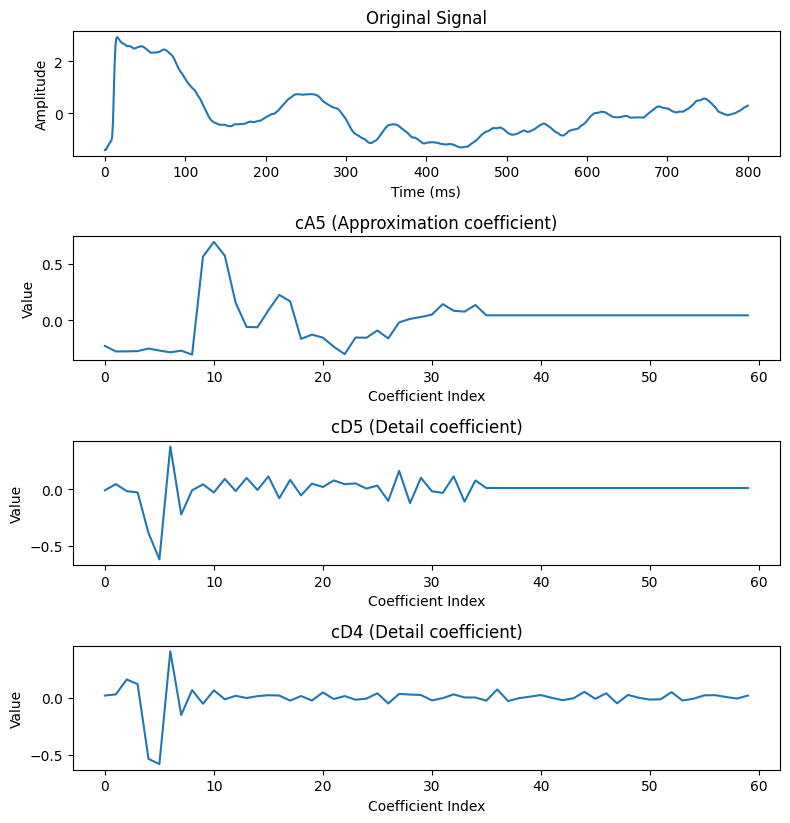

In [10]:
time, signal = load_preprocessed_signal(prima_files_BC_and_RGC[0])
print("Shape of raw data:", signal.shape)


def extract_dwt_features(signal, wavelet='db6', level=4):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    #print("DWT Coefficients lengths before padding:", [len(c) for c in coeffs])
    # drop cD1 (highest-frequency detail) 
    coeffs = coeffs[:-3]  
    max_len = max(len(c) for c in coeffs)
    # Zero-pad each coefficient array to the same length
    padded = [np.pad(c, (0, max_len - len(c))) for c in coeffs]
    #print("DWT Coefficients lengths after padding:", [len(c) for c in padded])
    # scale each coefficient array to have zero mean and unit variance
    padded = [(c - np.mean(c)) / np.std(c) for c in padded]
    # scale to have 1 peak to-peak amplitude
    padded = [c / (np.max(c) - np.min(c)) for c in padded]
    return np.stack(padded, axis=0)

def get_coeff_names(level=4):
    coeff_names = [f"cA{level} (Approximation coefficient)"] + [f"cD{l} (Detail coefficient)" for l in range(level, 0, -1)]
    return coeff_names[:-3]  # drop cD1


dwt_coeffs = extract_dwt_features(signal, wavelet='db6', level=5)
dwt_coeff_names = get_coeff_names(level=5)

# plot the original signal and its DWT coefficients
plt.figure(figsize=(8, 12))
plt.subplot(6, 1, 1)
plt.title("Original Signal")
plt.plot(signal)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
for i, (coeff, name) in enumerate(zip(dwt_coeffs, dwt_coeff_names)):
    plt.subplot(6, 1, i+2)
    plt.plot(coeff)
    #plt.title(f"DWT Coefficient Level {i} {name}")
    plt.title(f"{name}")
    plt.xlabel("Coefficient Index")
    plt.ylabel("Value")
plt.tight_layout()
plt.show()

# 3. Test

--- Experiment 1 ---
Training samples: 171, batch size: 14, epochs: 30

--- Fold 1/10 ---
[Fold 1] Early stopped at epoch 30 → best epoch = 30, val_loss=0.6801, val_acc=0.6667, train_acc=0.9281
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(18, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 2/10 ---
[Fold 2] Early stopped at epoch 30 → best epoch = 29, val_loss=0.5479, val_acc=0.6471, train_acc=0.8896
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(17, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 3/10 ---
[Fold 3] Early stopped at epoch 30 → best epoch = 29, val_loss=0.6562, val_acc=0.8235, train_acc=0.8896
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(17, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 4/10 ---
[Fold 4] Early stopped at epoch 30 → best epoch = 28, val_loss=0.7837, val_acc=0.7059, train_acc=0.8961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(17, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 5/10 ---
[Fold 5] Early stopped at epoch 30 → best epoch = 30, val_loss=0.5152, val_acc=0.7647, train_acc=0.8766
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(17, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 6/10 ---
[Fold 6] Early stopped at epoch 30 → best epoch = 30, val_loss=0.6344, val_acc=0.5882, train_acc=0.8636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(17, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 7/10 ---
[Fold 7] Early stopped at epoch 30 → best epoch = 30, val_loss=0.5022, val_acc=0.8235, train_acc=0.9221
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(17, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 8/10 ---
[Fold 8] Early stopped at epoch 30 → best epoch = 30, val_loss=0.6305, val_acc=0.7059, train_acc=0.9091
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(17, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 9/10 ---
[Fold 9] Early stopped at epoch 30 → best epoch = 30, val_loss=0.4955, val_acc=0.7647, train_acc=0.8961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(17, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 10/10 ---
[Fold 10] Early stopped at epoch 30 → best epoch = 29, val_loss=0.6052, val_acc=0.6471, train_acc=0.8506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(17, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)


SHAP values shape: [(60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3)]
Averaged SHAP values shape: (60, 2, 3)


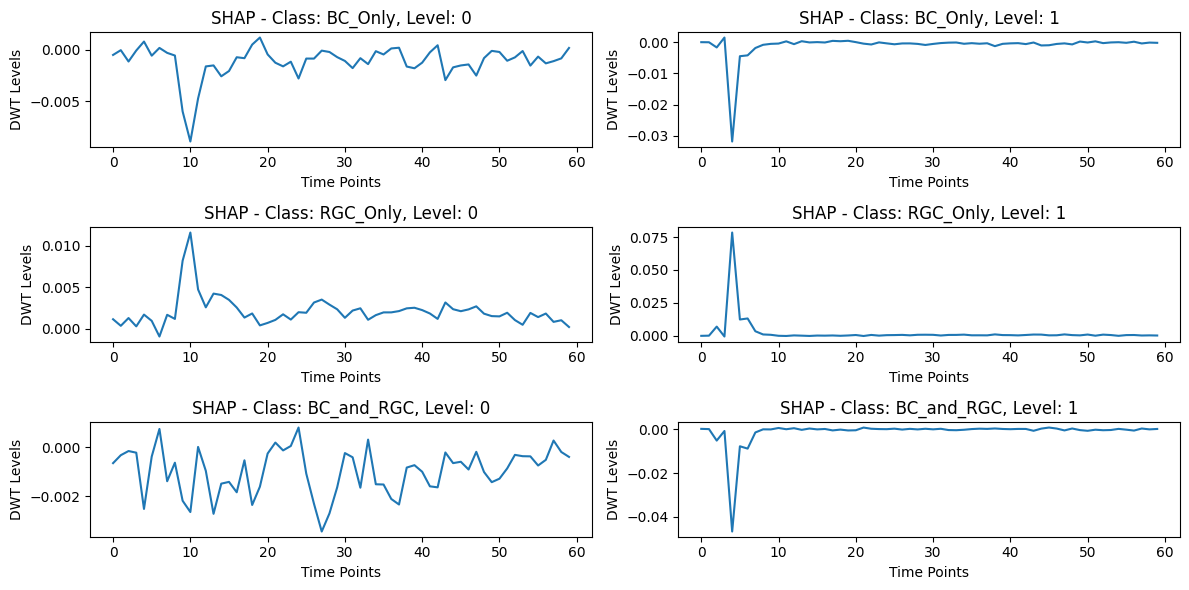

[[29 22  6]
 [14 38  5]
 [ 1  1 55]]
--- Experiment 2 ---
Training samples: 171, batch size: 14, epochs: 30

--- Fold 1/10 ---
[Fold 1] Early stopped at epoch 30 → best epoch = 28, val_loss=0.6710, val_acc=0.6111, train_acc=0.8954
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(18, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 2/10 ---
[Fold 2] Early stopped at epoch 30 → best epoch = 30, val_loss=0.6977, val_acc=0.5882, train_acc=0.8961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(17, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 3/10 ---
[Fold 3] Early stopped at epoch 30 → best epoch = 29, val_loss=0.7776, val_acc=0.4706, train_acc=0.8636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(17, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 4/10 ---
[Fold 4] Early stopped at epoch 30 → best epoch = 29, val_loss=0.6719, val_acc=0.8235, train_acc=0.8571
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(17, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)



--- Fold 5/10 ---


In [ ]:
all_files_BC_only = prima_files_BC_only + mp20_files_BC_only
all_files_RGC_only = prima_files_RGC_only + mp20_files_RGC_only
all_files_BC_and_RGC = prima_files_BC_and_RGC + mp20_files_BC_and_RGC

average_results = {}
results = []
mean_shap_values = []
all_conf_matrices = []
for experiments in range(5):
    print(f"--- Experiment {experiments + 1} ---")
    np.random.seed(42)
    # no_files = min(len(prima_files_BC_only), len(prima_files_RGC_only), len(prima_files_BC_and_RGC))
    # sampled_BC = np.random.choice(prima_files_BC_only, no_files, replace=False)
    # sampled_RGC = np.random.choice(prima_files_RGC_only, no_files, replace=False)
    # sampled_BC_and_RGC = np.random.choice(prima_files_BC_and_RGC, no_files, replace=False)
    no_files = min(len(all_files_BC_only), len(all_files_RGC_only), len(all_files_BC_and_RGC))
    sampled_BC = np.random.choice(all_files_BC_only, no_files, replace=False)
    sampled_RGC = np.random.choice(all_files_RGC_only, no_files, replace=False)
    sampled_BC_and_RGC = np.random.choice(all_files_BC_and_RGC, no_files, replace=False)

    X, raw_X, file_list, labels = [], [], [], []
    for file in sampled_BC:
        _, signal = load_preprocessed_signal(file)
        X.append(extract_dwt_features(signal, wavelet='db6', level=4))
        raw_X.append(signal)
        file_list.append(file)
        labels.append("BC_Only")

    for file in sampled_RGC:
        _, signal = load_preprocessed_signal(file)
        X.append(extract_dwt_features(signal, wavelet='db6', level=4))
        raw_X.append(signal)
        file_list.append(file)
        labels.append("RGC_Only")

    for file in sampled_BC_and_RGC:
        _, signal = load_preprocessed_signal(file)
        X.append(extract_dwt_features(signal, wavelet='db6', level=4))
        raw_X.append(signal)
        file_list.append(file)
        labels.append("BC_and_RGC")
    X = np.stack(X, axis=0)                     # (n_samples, n_levels, n_points)
    X = np.transpose(X, (0, 2, 1)).astype('float32')  # (n_samples, n_points, n_levels)


    n_train = len(X)
    batch_size = max(4, min(32, n_train // 12))
    if n_train < 100:
        epochs = 50
    else:
        epochs = 30
    print(f"Training samples: {n_train}, batch size: {batch_size}, epochs: {epochs}")

    clf = Multichannel_1DCNN()
    y_true, y_pred, shap_values, all_test_indices = clf.fit_nfoldcv(X=X, y=labels, n_splits=10, random_state=42, epochs=epochs, batch_size=batch_size)
    print("SHAP values shape:", [sv.shape for sv in shap_values])
    # average over folds
    shap_values = np.mean(shap_values, axis=0) # dimension (200, 4, 3) = (n_points, n_levels, n_classes)
    print("Averaged SHAP values shape:", shap_values.shape) 
    mean_shap_values.append(shap_values)


    plt.figure(figsize=(12, 6))
    class_names = ["BC_Only", "RGC_Only", "BC_and_RGC"]
    for i, class_name in enumerate(class_names):
        for j in range(shap_values.shape[1]):
            plt.subplot(len(class_names), shap_values.shape[1], i * shap_values.shape[1] + j + 1)
            plt.title(f"SHAP - Class: {class_name}, Level: {j}")
            plt.plot(shap_values[:, :, i][:, j])
            plt.xlabel("Time Points")
            plt.ylabel("DWT Levels")
    plt.tight_layout()
    plt.show()

    # save misclassified:
    misclassified = {
        "BC_Only": {"as_BC": [], "as_RGC": [], "as_BC_RGC": []},
        "RGC_Only": {"as_BC": [], "as_RGC": [], "as_BC_RGC": []},
        "BC_and_RGC": {"as_BC": [], "as_RGC": [], "as_BC_RGC": []},
    }

    pred_to_key = {
        "BC_Only": "as_BC",
        "RGC_Only": "as_RGC",
        "BC_and_RGC": "as_BC_RGC",
    }

    for (yt, yp, idx) in zip(y_true, y_pred, all_test_indices):
        if yt != yp:
            misclassified[yt][pred_to_key[yp]].append({"signal": raw_X[idx], "file": file_list[idx]}) 

    unique_labels = np.unique(labels)
    metrics = clf.evaluate(y_true, y_pred)

    results.append({
            "Accuracy": metrics["accuracy"],
            "BalancedAcc": metrics["balanced_accuracy"],
            "F1": metrics["f1_score"],
            "Acc BC_Only": metrics["report"]["BC_Only"]["recall"],
            "Acc RGC_and_BC": metrics["report"]["BC_and_RGC"]["recall"],
            "Acc RGC_Only": metrics["report"]["RGC_Only"]["recall"],
        })
    all_conf_matrices.append(
        confusion_matrix(
            y_true, y_pred, labels=["BC_Only", "RGC_Only", "BC_and_RGC"]
        )
    )

accs = [r["Accuracy"] for r in results]
balanced_accs = [r["BalancedAcc"] for r in results]
f1s = [r["F1"] for r in results]
bc_accs = [float(r["Acc BC_Only"]) for r in results]
rgc_accs = [float(r["Acc RGC_Only"]) for r in results]
bc_rgc_accs = [float(r["Acc RGC_and_BC"]) for r in results]

average_results = {
    "Accuracy_mean": np.mean(accs),
    "Accuracy_std": np.std(accs),
    "BalancedAcc_mean": np.mean(balanced_accs),
    "BalancedAcc_std": np.std(balanced_accs),
    "F1_mean": np.mean(f1s),
    "F1_std": np.std(f1s),

    # per-class accuracies (recall)
    "Acc_BC_Only_mean": np.mean(bc_accs),
    "Acc_BC_Only_std": np.std(bc_accs),
    "Acc_RGC_Only_mean": np.mean(rgc_accs),
    "Acc_RGC_Only_std": np.std(rgc_accs),
    "Acc_BC_and_RGC_mean": np.mean(bc_rgc_accs),
    "Acc_BC_and_RGC_std": np.std(bc_rgc_accs),
}
mean_conf_matrix = np.mean(all_conf_matrices, axis=0)
mean_conf_matrix = mean_conf_matrix / mean_conf_matrix.sum(axis=1, keepdims=True)

labels = ["BC_Only", "RGC_Only", "BC_and_RGC"] 
plt.figure(figsize=(6,5)) 
sns.heatmap(mean_conf_matrix, annot=True, fmt=".2f", cmap="viridis", xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Proportion'}) 
plt.title(f"Mean Confusion Matrix") 
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.tight_layout()
plt.show()

In [ ]:
# compute and print average results
print("Average Results over 10 experiments:")
for k, v in average_results.items():
    print(f"{k}: {v:.4f}")

Average Results over 10 experiments:
Accuracy_mean: 0.7983
Accuracy_std: 0.0139
BalancedAcc_mean: 0.7983
BalancedAcc_std: 0.0139
F1_mean: 0.7977
F1_std: 0.0142
Acc_BC_Only_mean: 0.7179
Acc_BC_Only_std: 0.0281
Acc_RGC_Only_mean: 0.7231
Acc_RGC_Only_std: 0.0441
Acc_BC_and_RGC_mean: 0.9538
Acc_BC_and_RGC_std: 0.0103


# 4.Explain

Global mean SHAP shape: (109, 3, 3)
SHAP thresholds per class at 98 percentile: [0.00088817 0.00076978 0.00101369]


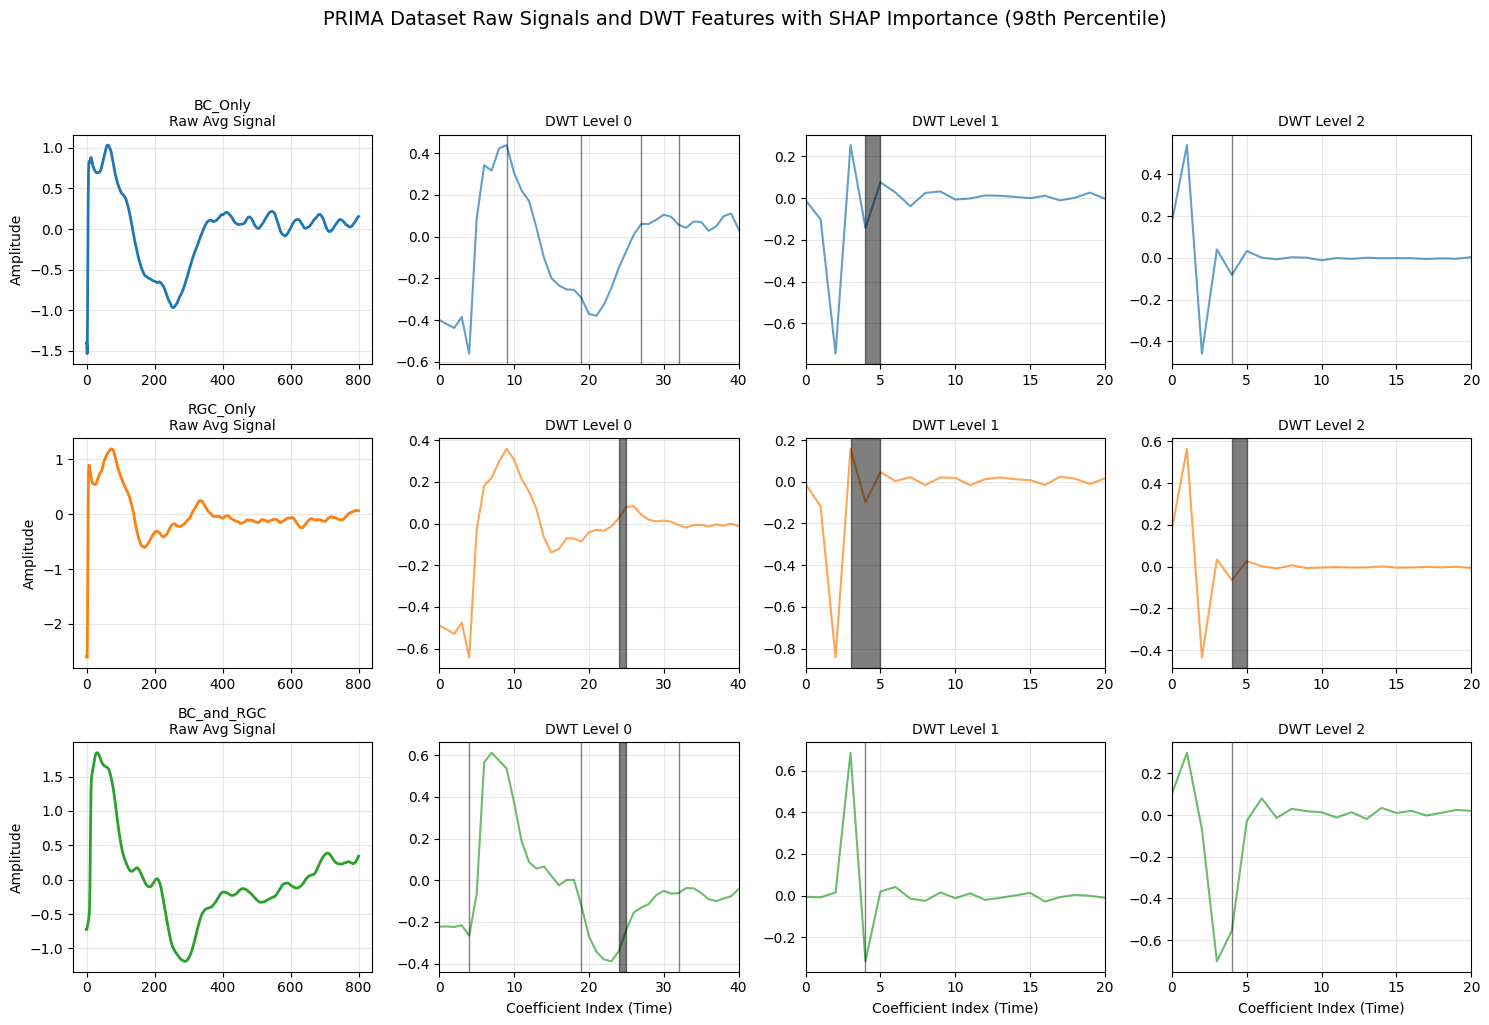

In [ ]:
N_LEVELS = 3
ABS_SHAP_THRESHOLD_PERCENTILE = 98
# Average SHAP values across all experiments 
mean_shap_values_global = np.mean(np.stack(mean_shap_values, axis=0), axis=0) # shape (n_points, n_levels, n_classes) 
print("Global mean SHAP shape:", mean_shap_values_global.shape) 
# find 98th percentile threshold for each class
shap_thresholds = np.percentile(np.abs(mean_shap_values_global), ABS_SHAP_THRESHOLD_PERCENTILE, axis=(0, 1))
print("SHAP thresholds per class at", ABS_SHAP_THRESHOLD_PERCENTILE, "percentile:", shap_thresholds)

mean_signals = {} 
mean_signals["BC_Only"] = avg_BC_sig 
mean_signals["RGC_Only"] = avg_RGC_sig 
mean_signals["BC_and_RGC"] = avg_BC_RGC_sig 
mean_dwt_features = {} 
mean_dwt_features["BC_Only"] = extract_dwt_features(avg_BC_sig, wavelet='db4', level=4) 
mean_dwt_features["RGC_Only"] = extract_dwt_features(avg_RGC_sig, wavelet='db4', level=4) 
mean_dwt_features["BC_and_RGC"] = extract_dwt_features(avg_BC_RGC_sig, wavelet='db4', level=4) 

def plot_mean_signals_and_dwt(mean_signals, mean_dwt_features, mean_shap_values_global, shap_thresholds, 
                              dataset_name="Dataset", N_LEVELS=3, ABS_SHAP_THRESHOLD_PERCENTILE=98):
    label_colors = {
        "BC_Only": 'C0',  # Blue
        "RGC_Only": 'C1', # Orange
        "BC_and_RGC": 'C2' # Green
    }
    unique_labels = ["BC_Only", "RGC_Only", "BC_and_RGC"]

    # Define level-specific x-axis limits
    level_xlim = {0: (0, 40), 1: (0, 20), 2: (0, 20)}

    plt.figure(figsize=(15, 10))
    for c_idx, class_label in enumerate(unique_labels):
        # --- Get class-specific data ---
        avg_sig = mean_signals[class_label]                  # (N_points,)
        avg_dwt = mean_dwt_features[class_label]             # (N_levels, N_points)
        mean_shap_c = mean_shap_values_global[:, :, c_idx]   # (N_points, N_levels)
        color = label_colors[class_label]

        # --- Plot raw signal (first column) ---
        ax_raw = plt.subplot(len(unique_labels), N_LEVELS + 1, c_idx * (N_LEVELS + 1) + 1)
        ax_raw.plot(avg_sig, color=color, lw=2)
        ax_raw.set_title(f"{class_label}\nRaw Avg Signal", fontsize=10)
        ax_raw.set_ylabel("Amplitude")
        ax_raw.grid(True, alpha=0.3)

        # --- Plot DWT levels ---
        #for l_idx in range(N_LEVELS):
        for l_idx in range(min(N_LEVELS, avg_dwt.shape[0])):
            ax_dwt = plt.subplot(len(unique_labels), N_LEVELS + 1, c_idx * (N_LEVELS + 1) + 2 + l_idx)

            # Set x-axis window depending on level
            if l_idx in level_xlim:
                ax_dwt.set_xlim(*level_xlim[l_idx])
            else:
                ax_dwt.set_xlim(0, 80)  

            dwt_level_sig = avg_dwt[l_idx, :]
            shap_level_vals = mean_shap_c[:, l_idx]

            # Plot DWT
            ax_dwt.plot(dwt_level_sig, color=color, alpha=0.7)
            ax_dwt.set_title(f"DWT Level {l_idx}", fontsize=10)
            ax_dwt.grid(True, alpha=0.3)

            # Highlight SHAP regions
            abs_shap = np.abs(shap_level_vals)
            important_indices = np.where(abs_shap >= shap_thresholds[c_idx])[0]

            if important_indices.size > 0:
                # Merge continuous segments
                segments = []
                start = important_indices[0]
                end = important_indices[0]
                for i in range(1, len(important_indices)):
                    if important_indices[i] == important_indices[i-1] + 1:
                        end = important_indices[i]
                    else:
                        segments.append((start, end))
                        start = important_indices[i]
                        end = important_indices[i]
                segments.append((start, end))

                # Draw shaded regions
                for start, end in segments:
                    ax_dwt.axvspan(start, end, alpha=0.5, color='k', zorder=10)

            if c_idx == len(unique_labels) - 1:
                ax_dwt.set_xlabel("Coefficient Index (Time)")

    plt.suptitle(f"{dataset_name} Raw Signals and DWT Features with SHAP Importance "
                 f"({ABS_SHAP_THRESHOLD_PERCENTILE}th Percentile)",
                 fontsize=14, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

plot_mean_signals_and_dwt(mean_signals, mean_dwt_features, mean_shap_values_global, shap_thresholds, 
                          dataset_name="PRIMA Dataset", N_LEVELS=3, ABS_SHAP_THRESHOLD_PERCENTILE=98)

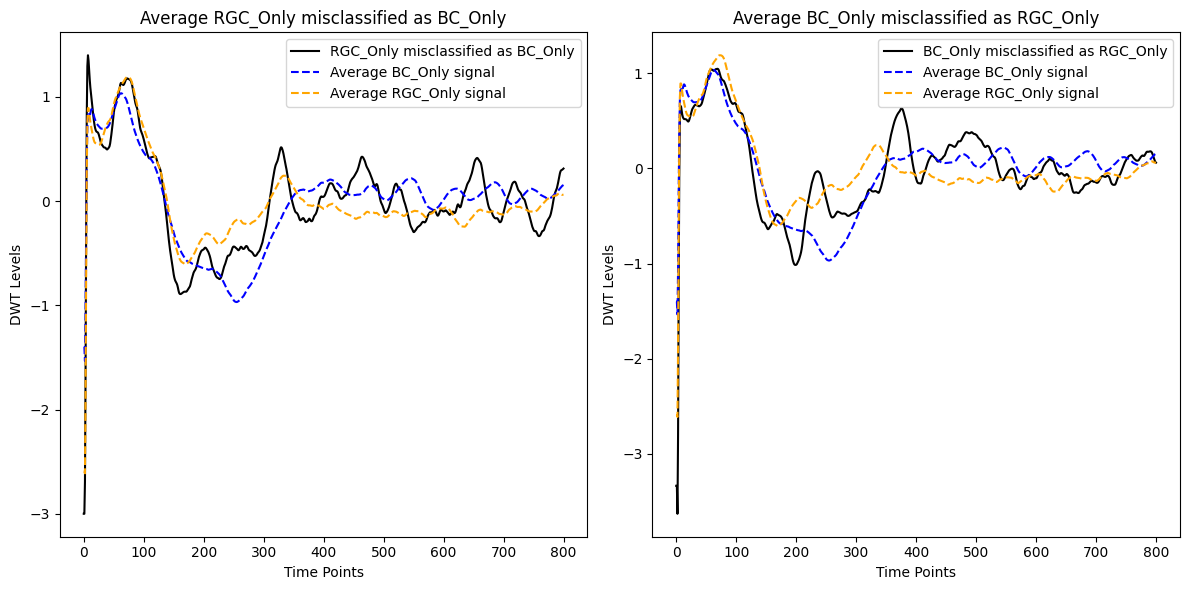

In [ ]:
# -----------------------------
# Compute average misclassified waveforms
# -----------------------------
def compute_avg(samples_list):
    if len(samples_list) == 0:
        return None
    
    # extract only the raw signals
    signals = [entry["signal"] for entry in samples_list]
    return np.mean(np.stack(signals), axis=0)

avg_RGC_as_BC = compute_avg(misclassified["RGC_Only"]["as_BC"])
avg_BC_as_RGC = compute_avg(misclassified["BC_Only"]["as_RGC"])

# plot average misclassified waveforms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(avg_RGC_as_BC, label="RGC_Only misclassified as BC_Only", color = 'black')
plt.plot(avg_BC_sig, label="Average BC_Only signal", linestyle='--', color='blue')
plt.plot(avg_RGC_sig, label="Average RGC_Only signal", linestyle='--', color='orange')
plt.title("Average RGC_Only misclassified as BC_Only")
plt.xlabel("Time Points")
plt.ylabel("DWT Levels")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(avg_BC_as_RGC, label="BC_Only misclassified as RGC_Only", color = 'black')
plt.plot(avg_BC_sig, label="Average BC_Only signal", linestyle='--', color='blue')
plt.plot(avg_RGC_sig, label="Average RGC_Only signal", linestyle='--', color='orange')
plt.title("Average BC_Only misclassified as RGC_Only")
plt.xlabel("Time Points")
plt.ylabel("DWT Levels")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from preprocessing import extract_PulseWidth_SignalPower

overall_pulses = []
overall_irrad = []
def normalize_file(file):
    if isinstance(file, dict) and "file" in file:
        filepath = file["file"]
    else:
        filepath = file
    fname = os.path.basename(filepath).replace(".csv", "")
    return fname

for file in misclassified["RGC_Only"]["as_BC"]:
    fname = normalize_file(file)
    pulseWidth, signalPower = extract_PulseWidth_SignalPower(fname)
    overall_pulses.append(pulseWidth)
    overall_irrad.append(signalPower)
    #print("pulse width:", pulseWidth, "irradiance:", signalPower)

avg_pulse_width_RGC_as_BC = np.mean(overall_pulses)
avg_irradiance_RGC_as_BC = np.mean(overall_irrad)

overall_pulses = []
overall_irrad = []
for file in misclassified["BC_Only"]["as_RGC"]:
    fname = normalize_file(file)
    pulseWidth, signalPower = extract_PulseWidth_SignalPower(fname)
    overall_pulses.append(pulseWidth)
    overall_irrad.append(signalPower)
    #print("pulse width:", pulseWidth, "irradiance:", signalPower)

avg_pulse_width_BC_as_RGC = np.mean(overall_pulses)
avg_irradiance_BC_as_RGC = np.mean(overall_irrad)

# compute overall averages and print
overall_pulse_width_BC = np.mean([extract_PulseWidth_SignalPower(normalize_file(file))[0] for file in prima_files_BC_only ])
overall_irradiance_BC = np.mean([extract_PulseWidth_SignalPower(normalize_file(file))[1] for file in prima_files_BC_only ])
overall_pulse_width_RGC = np.mean([extract_PulseWidth_SignalPower(normalize_file(file))[0] for file in prima_files_RGC_only ])
overall_irradiance_RGC = np.mean([extract_PulseWidth_SignalPower(normalize_file(file))[1] for file in prima_files_RGC_only ])

print("Average pulse width RGC as BC:", avg_pulse_width_RGC_as_BC, " Overall RGC pulse width:", overall_pulse_width_RGC)
print("Average irradiance RGC as BC:", avg_irradiance_RGC_as_BC, " Overall RGC irradiance:", overall_irradiance_RGC)
print("Average pulse width BC as RGC:", avg_pulse_width_BC_as_RGC, " Overall BC pulse width:", overall_pulse_width_BC)
print("Average irradiance BC as RGC:", avg_irradiance_BC_as_RGC, " Overall BC irradiance:", overall_irradiance_BC)

Average pulse width RGC as BC: 4.681818181818182  Overall RGC pulse width: 4.492424242424242
Average irradiance RGC as BC: 2.6363636363636362  Overall RGC irradiance: 2.742424242424242
Average pulse width BC as RGC: 4.3125  Overall BC pulse width: 4.506896551724138
Average irradiance BC as RGC: 0.75  Overall BC irradiance: 0.5172413793103449


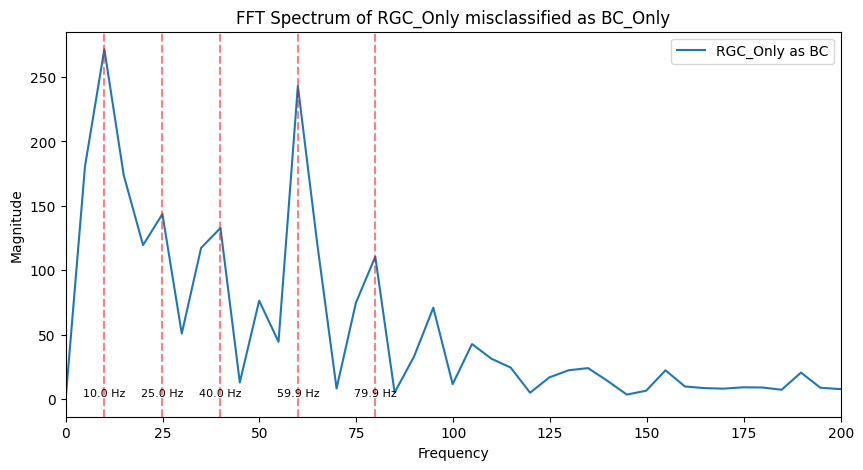

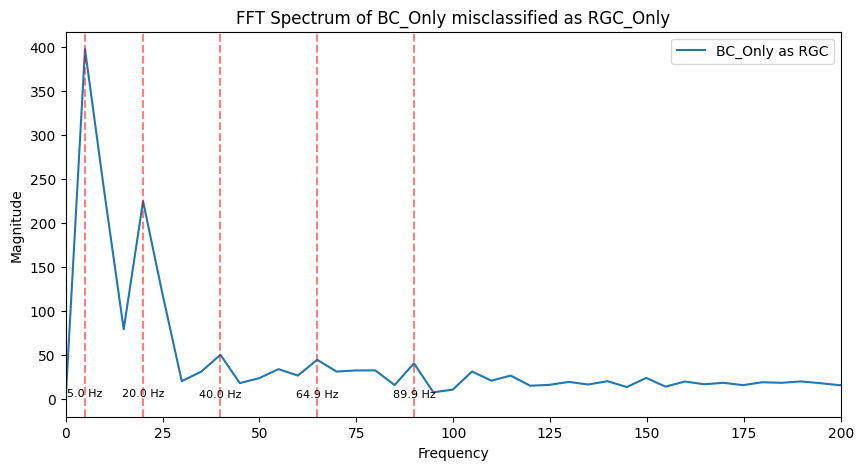

In [ ]:
# look at FFT spectrum of misclassified signals

plt.figure(figsize=(10, 5))
for file in misclassified["RGC_Only"]["as_BC"][:1]:
    signal = file["signal"]
    N = len(signal)
    T = (time[1] - time[0])/1000

    fft_vals = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(len(signal), d=T)  # assuming uniform sampling with step size T
    peak_candidates = []
    for i in range(1, len(fft_vals)//2 - 1):
        if np.abs(fft_vals[i]) > np.abs(fft_vals[i-1]) and np.abs(fft_vals[i]) > np.abs(fft_vals[i+1]):
            peak_candidates.append((fft_freq[i], 2.0/len(signal) * np.abs(fft_vals[i])))

    # --- Sort peaks by amplitude descending ---
    peak_candidates.sort(key=lambda x: x[1], reverse=True)

    # --- Keep the top 5 frequencies ---
    top5 = peak_candidates[:5]
    plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_vals)[:len(fft_vals)//2], label="RGC_Only as BC")
    for freq, amp in top5:
        if freq < 200:
            plt.axvline(x=freq, color='r', linestyle='--', alpha=0.5)
            plt.text(freq, amp, f"{freq:.1f} Hz", fontsize=8, ha='center', va='bottom')
plt.xlim(0,200)
plt.title("FFT Spectrum of RGC_Only misclassified as BC_Only")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
for file in misclassified["BC_Only"]["as_RGC"][:1]:
    signal = file["signal"]
    N = len(signal)
    T = (time[1] - time[0])/1000

    fft_vals = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(len(signal), d=T)  # assuming uniform sampling with step size T
    peak_candidates = []
    for i in range(1, len(fft_vals)//2 - 1):
        if np.abs(fft_vals[i]) > np.abs(fft_vals[i-1]) and np.abs(fft_vals[i]) > np.abs(fft_vals[i+1]):
            peak_candidates.append((fft_freq[i], 2.0/len(signal) * np.abs(fft_vals[i])))

    # --- Sort peaks by amplitude descending ---
    peak_candidates.sort(key=lambda x: x[1], reverse=True)

    # --- Keep the top 5 frequencies ---
    top5 = peak_candidates[:5]
    plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_vals)[:len(fft_vals)//2], label="BC_Only as RGC")
    for freq, amp in top5:
        if freq < 200:
            plt.axvline(x=freq, color='r', linestyle='--', alpha=0.5)
            plt.text(freq, amp, f"{freq:.1f} Hz", fontsize=8, ha='center', va='bottom')
plt.xlim(0,200)
plt.title("FFT Spectrum of BC_Only misclassified as RGC_Only")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

## 5. Train / Test = Prima / MP20

--- Experiment 1 ---
Training samples: 117, batch size: 11, epochs: 100, n_BC_train: 39, n_RGC_train: 39, n_BC_and_RGC_train: 39
Testing samples: 54, n_BC_test: 18, n_RGC_test: 18, n_BC_and_RGC_test: 18
Model output shape: (None, 3)
    1 |     0.3932 |     0.5370
    2 |     0.6325 |     0.6296
    3 |     0.7949 |     0.5741
    4 |     0.7436 |     0.3519
    5 |     0.8376 |     0.6111
    6 |     0.8120 |     0.3333
    7 |     0.7863 |     0.3333
    8 |     0.7949 |     0.6481
    9 |     0.8205 |     0.6296
   10 |     0.8547 |     0.3333
   11 |     0.8632 |     0.3333
   12 |     0.8462 |     0.5370
   13 |     0.8462 |     0.6296
   14 |     0.8718 |     0.6296
   15 |     0.9060 |     0.5000
   16 |     0.9145 |     0.3333
   17 |     0.9145 |     0.3333
   18 |     0.8889 |     0.6481
   19 |     0.9316 |     0.6481
   20 |     0.9231 |     0.6111
   21 |     0.9145 |     0.5370
   22 |     0.8803 |     0.3519
   23 |     0.8974 |     0.5556
   24 |     0.9402 |     0.6667

/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(54, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)


SHAP values shape: [(60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3)]
Averaged SHAP values shape: (60, 2, 3)


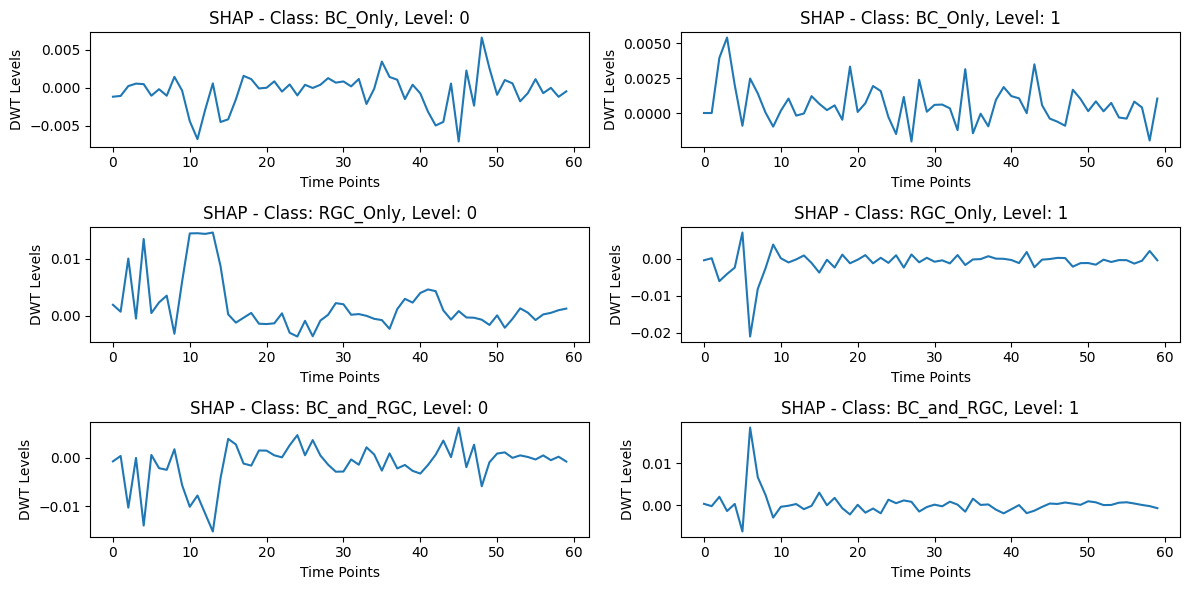

[[ 4  9  5]
 [ 4 14  0]
 [ 0  1 17]]
--- Experiment 2 ---
Training samples: 117, batch size: 11, epochs: 100, n_BC_train: 39, n_RGC_train: 39, n_BC_and_RGC_train: 39
Testing samples: 54, n_BC_test: 18, n_RGC_test: 18, n_BC_and_RGC_test: 18
Model output shape: (None, 3)
    1 |     0.4017 |     0.3333
    2 |     0.7094 |     0.4815
    3 |     0.6325 |     0.4074
    4 |     0.6752 |     0.3889
    5 |     0.7350 |     0.3333
    6 |     0.6838 |     0.3333
    7 |     0.8291 |     0.3333
    8 |     0.7179 |     0.3333
    9 |     0.8034 |     0.3333
   10 |     0.7692 |     0.3333
   11 |     0.8120 |     0.3333
   12 |     0.8547 |     0.3333
   13 |     0.8120 |     0.3333
   14 |     0.8376 |     0.3333
   15 |     0.8462 |     0.3333
   16 |     0.7949 |     0.3333
   17 |     0.8803 |     0.3333
   18 |     0.8889 |     0.3333
   19 |     0.8632 |     0.3333
   20 |     0.8632 |     0.3333
   21 |     0.8889 |     0.3704
   22 |     0.8889 |     0.3519
   23 |     0.9231 |     0

/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_14
Received: inputs=['Tensor(shape=(54, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_14
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)


SHAP values shape: [(60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3)]
Averaged SHAP values shape: (60, 2, 3)


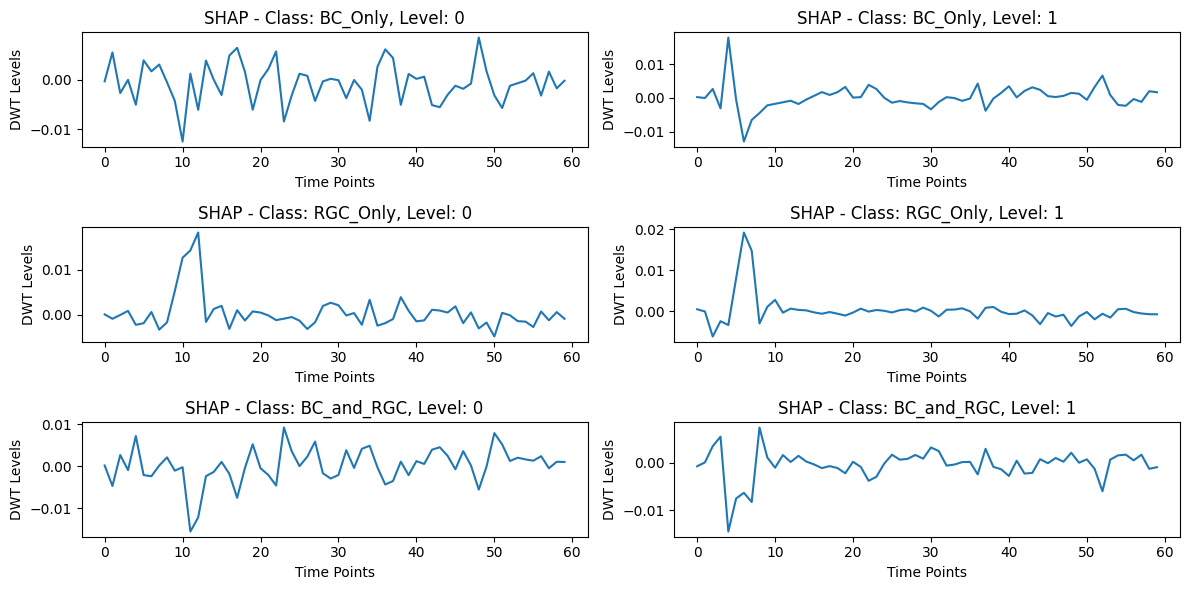

[[ 9  9  0]
 [ 8 10  0]
 [ 0  2 16]]
--- Experiment 3 ---
Training samples: 117, batch size: 11, epochs: 100, n_BC_train: 39, n_RGC_train: 39, n_BC_and_RGC_train: 39
Testing samples: 54, n_BC_test: 18, n_RGC_test: 18, n_BC_and_RGC_test: 18
Model output shape: (None, 3)
    1 |     0.4872 |     0.4444
    2 |     0.5556 |     0.5370
    3 |     0.7009 |     0.5185
    4 |     0.7607 |     0.5185
    5 |     0.7863 |     0.6296
    6 |     0.7949 |     0.6481
    7 |     0.8462 |     0.6111
    8 |     0.8291 |     0.6296
    9 |     0.7692 |     0.5370
   10 |     0.7778 |     0.5556
   11 |     0.8803 |     0.5556
   12 |     0.8291 |     0.6111
   13 |     0.8718 |     0.5741
   14 |     0.8034 |     0.5741
   15 |     0.8889 |     0.5741
   16 |     0.8462 |     0.5000
   17 |     0.8632 |     0.5000
   18 |     0.8632 |     0.5741
   19 |     0.8974 |     0.6296
   20 |     0.8974 |     0.5185
   21 |     0.9060 |     0.4815
   22 |     0.8974 |     0.5741
   23 |     0.8889 |     0

/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_28
Received: inputs=['Tensor(shape=(54, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_28
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)


SHAP values shape: [(60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3)]
Averaged SHAP values shape: (60, 2, 3)


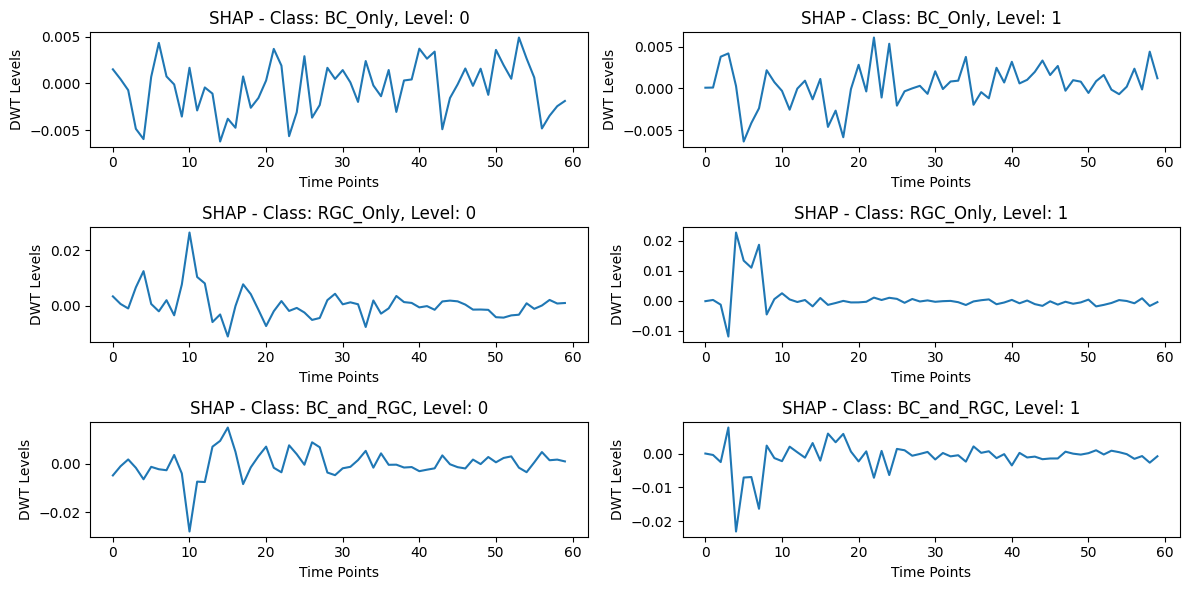

[[ 9  8  1]
 [ 7 11  0]
 [ 1  0 17]]
--- Experiment 4 ---
Training samples: 117, batch size: 11, epochs: 100, n_BC_train: 39, n_RGC_train: 39, n_BC_and_RGC_train: 39
Testing samples: 54, n_BC_test: 18, n_RGC_test: 18, n_BC_and_RGC_test: 18
Model output shape: (None, 3)
    1 |     0.3846 |     0.5556
    2 |     0.5641 |     0.6111
    3 |     0.6752 |     0.4074
    4 |     0.6752 |     0.3704
    5 |     0.7265 |     0.3704
    6 |     0.7863 |     0.3704
    7 |     0.8205 |     0.3519
    8 |     0.8120 |     0.3333
    9 |     0.8205 |     0.3333
   10 |     0.8120 |     0.3333
   11 |     0.8291 |     0.3519
   12 |     0.8034 |     0.3333
   13 |     0.8376 |     0.3704
   14 |     0.8120 |     0.3333
   15 |     0.8547 |     0.3519
   16 |     0.8291 |     0.3704
   17 |     0.8803 |     0.3519
   18 |     0.8547 |     0.3519
   19 |     0.9316 |     0.3519
   20 |     0.9060 |     0.3704
   21 |     0.8889 |     0.3333
   22 |     0.8974 |     0.3889
   23 |     0.8547 |     0

/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_42
Received: inputs=['Tensor(shape=(54, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_42
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)


SHAP values shape: [(60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3)]
Averaged SHAP values shape: (60, 2, 3)


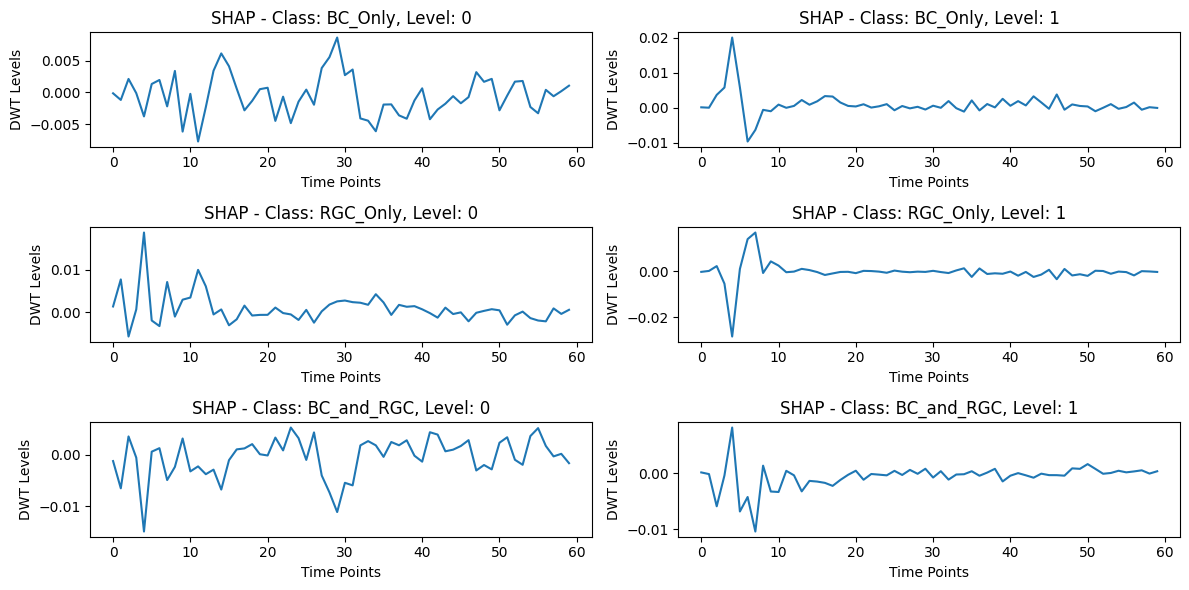

[[ 8  7  3]
 [ 9  9  0]
 [ 0  1 17]]
--- Experiment 5 ---
Training samples: 117, batch size: 11, epochs: 100, n_BC_train: 39, n_RGC_train: 39, n_BC_and_RGC_train: 39
Testing samples: 54, n_BC_test: 18, n_RGC_test: 18, n_BC_and_RGC_test: 18
Model output shape: (None, 3)
    1 |     0.3590 |     0.7037
    2 |     0.6068 |     0.5556
    3 |     0.6581 |     0.4074
    4 |     0.7179 |     0.3333
    5 |     0.6667 |     0.3333
    6 |     0.7692 |     0.3333
    7 |     0.7778 |     0.3333
    8 |     0.7778 |     0.3333
    9 |     0.8120 |     0.3333
   10 |     0.8120 |     0.4444
   11 |     0.8120 |     0.3333
   12 |     0.8547 |     0.3333
   13 |     0.7863 |     0.3333
   14 |     0.8718 |     0.3519
   15 |     0.8547 |     0.4815
   16 |     0.8889 |     0.4074
   17 |     0.8803 |     0.4074
   18 |     0.9060 |     0.3889
   19 |     0.8803 |     0.4259
   20 |     0.9145 |     0.3889
   21 |     0.8974 |     0.3333
   22 |     0.8291 |     0.3333
   23 |     0.9060 |     0

/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_56
Received: inputs=['Tensor(shape=(54, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_56
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)


SHAP values shape: [(60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3)]
Averaged SHAP values shape: (60, 2, 3)


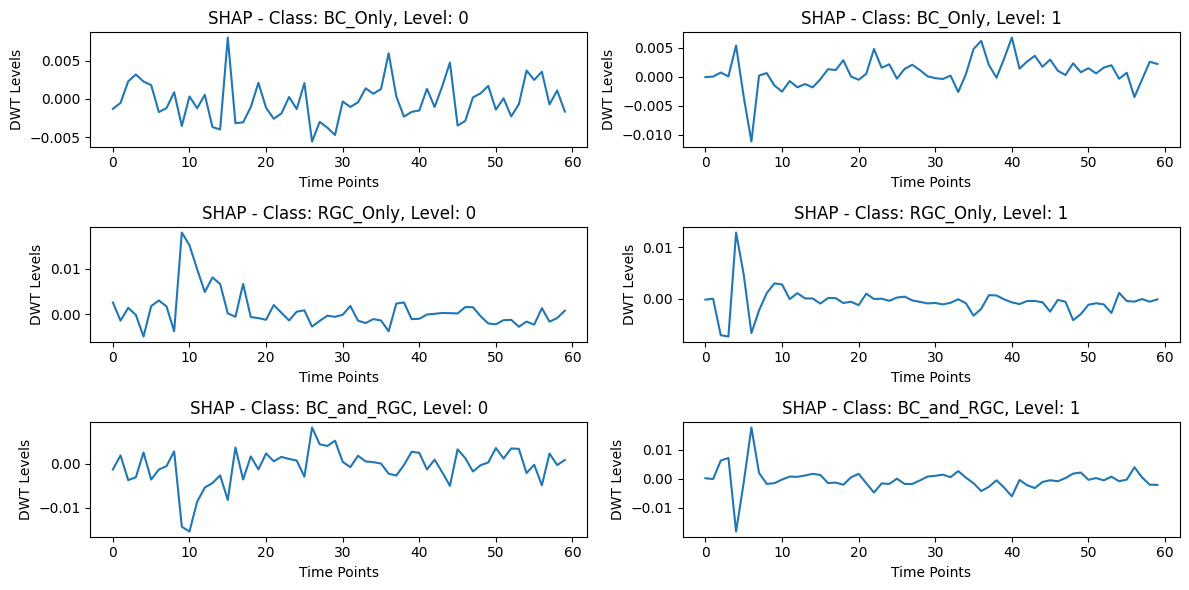

[[11  7  0]
 [ 6 12  0]
 [ 0  1 17]]
--- Experiment 6 ---
Training samples: 117, batch size: 11, epochs: 100, n_BC_train: 39, n_RGC_train: 39, n_BC_and_RGC_train: 39
Testing samples: 54, n_BC_test: 18, n_RGC_test: 18, n_BC_and_RGC_test: 18
Model output shape: (None, 3)
    1 |     0.4188 |     0.4074
    2 |     0.4615 |     0.5000
    3 |     0.5470 |     0.3704
    4 |     0.6496 |     0.5000
    5 |     0.7692 |     0.4074
    6 |     0.7692 |     0.3519
    7 |     0.8120 |     0.3333
    8 |     0.7692 |     0.4074
    9 |     0.7949 |     0.3889
   10 |     0.8291 |     0.3704
   11 |     0.8120 |     0.3333
   12 |     0.8291 |     0.3889
   13 |     0.8462 |     0.3704
   14 |     0.8889 |     0.3333
   15 |     0.8462 |     0.3333
   16 |     0.8632 |     0.3333
   17 |     0.8462 |     0.3519
   18 |     0.8889 |     0.3333
   19 |     0.9145 |     0.3333
   20 |     0.8889 |     0.3519
   21 |     0.8547 |     0.3704
   22 |     0.8803 |     0.3704
   23 |     0.9145 |     0

/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_70
Received: inputs=['Tensor(shape=(54, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_70
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)


SHAP values shape: [(60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3)]
Averaged SHAP values shape: (60, 2, 3)


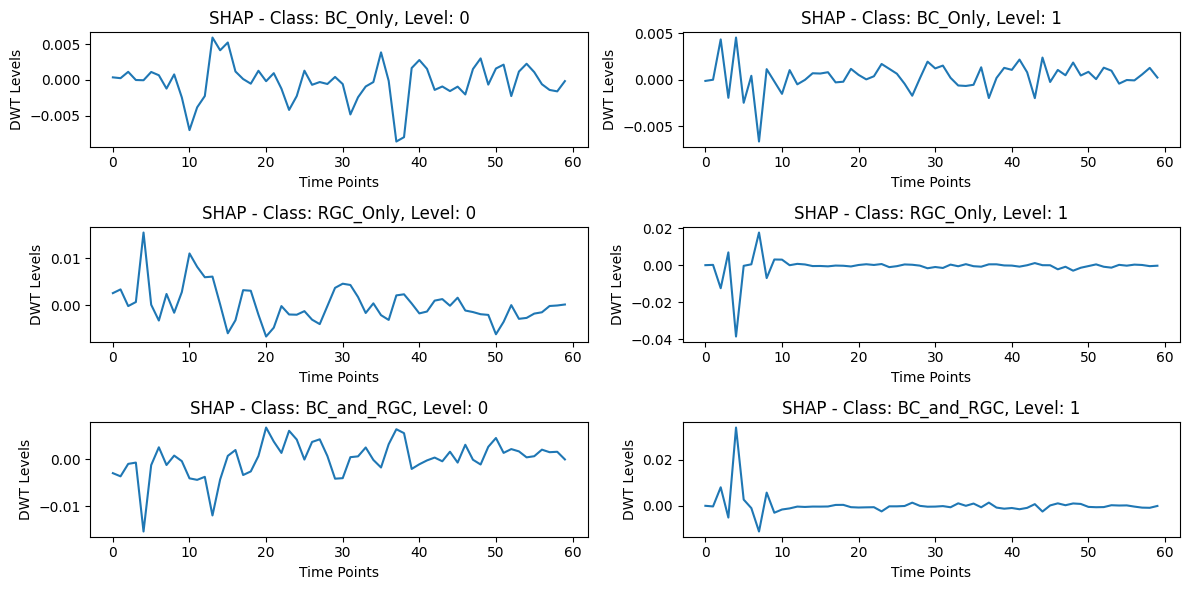

[[ 4 10  4]
 [ 4 14  0]
 [ 0  6 12]]
--- Experiment 7 ---
Training samples: 117, batch size: 11, epochs: 100, n_BC_train: 39, n_RGC_train: 39, n_BC_and_RGC_train: 39
Testing samples: 54, n_BC_test: 18, n_RGC_test: 18, n_BC_and_RGC_test: 18
Model output shape: (None, 3)
    1 |     0.3248 |     0.4259
    2 |     0.6325 |     0.4815
    3 |     0.7521 |     0.4074
    4 |     0.7521 |     0.4815
    5 |     0.8120 |     0.4630
    6 |     0.8376 |     0.4630
    7 |     0.8632 |     0.5370
    8 |     0.8376 |     0.5185
    9 |     0.8376 |     0.5185
   10 |     0.8205 |     0.6296
   11 |     0.8291 |     0.5926
   12 |     0.9060 |     0.6296
   13 |     0.8889 |     0.5370
   14 |     0.8803 |     0.5370
   15 |     0.9060 |     0.5741
   16 |     0.8803 |     0.6852
   17 |     0.8632 |     0.6852
   18 |     0.9231 |     0.6852
   19 |     0.8974 |     0.6667
   20 |     0.8632 |     0.6111
   21 |     0.8974 |     0.6481
   22 |     0.9231 |     0.6481
   23 |     0.9316 |     0

/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_84
Received: inputs=['Tensor(shape=(54, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_84
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)


SHAP values shape: [(60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3)]
Averaged SHAP values shape: (60, 2, 3)


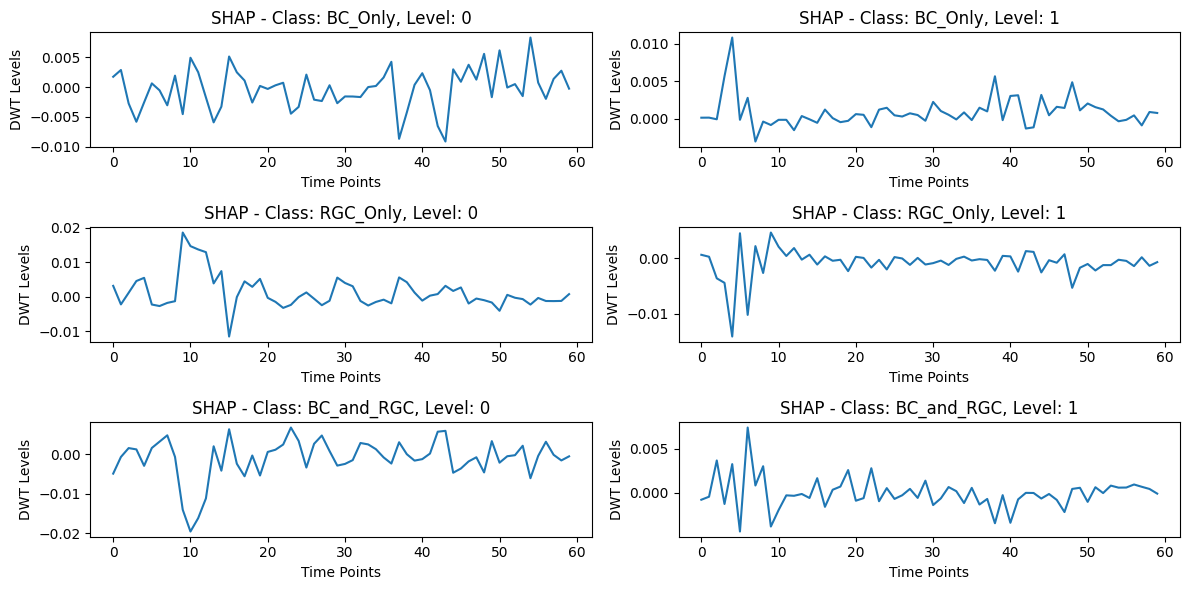

[[11  5  2]
 [ 9  9  0]
 [ 0  3 15]]
--- Experiment 8 ---
Training samples: 117, batch size: 11, epochs: 100, n_BC_train: 39, n_RGC_train: 39, n_BC_and_RGC_train: 39
Testing samples: 54, n_BC_test: 18, n_RGC_test: 18, n_BC_and_RGC_test: 18
Model output shape: (None, 3)
    1 |     0.4872 |     0.3148
    2 |     0.5726 |     0.3333
    3 |     0.6923 |     0.5185
    4 |     0.7863 |     0.5926
    5 |     0.7521 |     0.5741
    6 |     0.8632 |     0.5185
    7 |     0.8034 |     0.5926
    8 |     0.8120 |     0.4444
    9 |     0.8718 |     0.5926
   10 |     0.8034 |     0.6296
   11 |     0.8462 |     0.4259
   12 |     0.8547 |     0.6481
   13 |     0.8547 |     0.6481
   14 |     0.8974 |     0.6481
   15 |     0.9060 |     0.6481
   16 |     0.8889 |     0.5741
   17 |     0.8632 |     0.4815
   18 |     0.9231 |     0.6296
   19 |     0.9316 |     0.6852
   20 |     0.9316 |     0.6296
   21 |     0.9145 |     0.5556
   22 |     0.9060 |     0.4259
   23 |     0.9231 |     0

/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_98
Received: inputs=['Tensor(shape=(54, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_98
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)


SHAP values shape: [(60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3)]
Averaged SHAP values shape: (60, 2, 3)


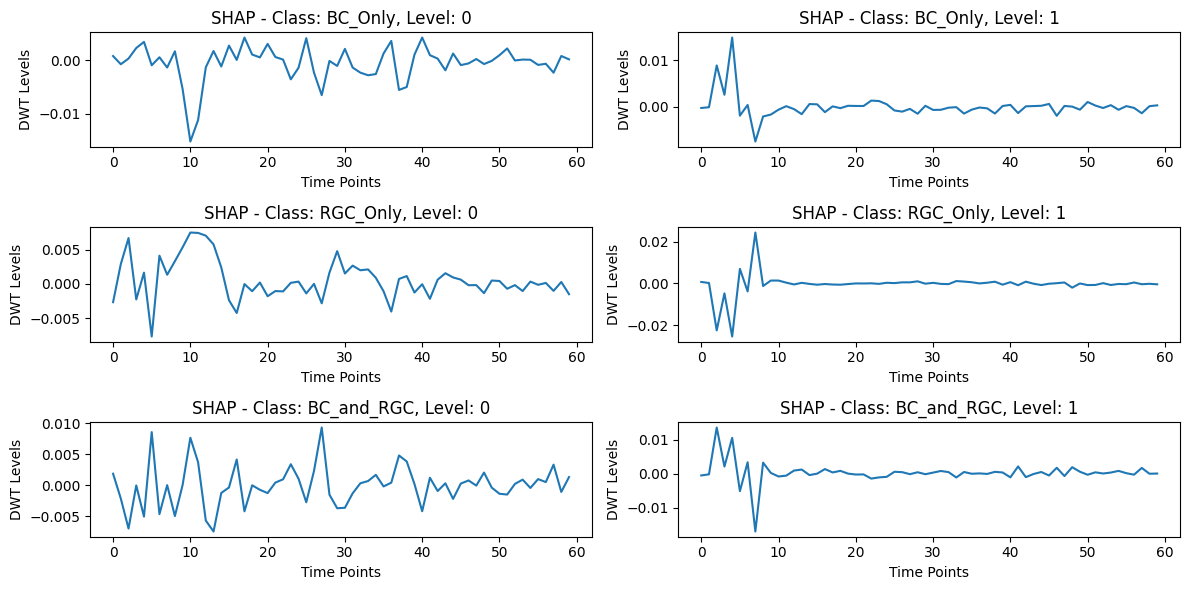

[[ 6 10  2]
 [ 7 11  0]
 [ 0  2 16]]
--- Experiment 9 ---
Training samples: 117, batch size: 11, epochs: 100, n_BC_train: 39, n_RGC_train: 39, n_BC_and_RGC_train: 39
Testing samples: 54, n_BC_test: 18, n_RGC_test: 18, n_BC_and_RGC_test: 18
Model output shape: (None, 3)
    1 |     0.3932 |     0.3704
    2 |     0.6239 |     0.5370
    3 |     0.6667 |     0.4074
    4 |     0.7607 |     0.3333
    5 |     0.7778 |     0.4444
    6 |     0.8205 |     0.5000
    7 |     0.7949 |     0.4815
    8 |     0.8120 |     0.5000
    9 |     0.7949 |     0.4815
   10 |     0.8205 |     0.4815
   11 |     0.8547 |     0.4815
   12 |     0.8205 |     0.3519
   13 |     0.8718 |     0.3889
   14 |     0.8291 |     0.5000
   15 |     0.8547 |     0.4815
   16 |     0.8120 |     0.4815
   17 |     0.9145 |     0.4630
   18 |     0.8547 |     0.4815
   19 |     0.9231 |     0.4815
   20 |     0.8803 |     0.6481
   21 |     0.8547 |     0.4815
   22 |     0.8974 |     0.5000
   23 |     0.8718 |     0

/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_112
Received: inputs=['Tensor(shape=(54, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_112
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)


SHAP values shape: [(60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3)]
Averaged SHAP values shape: (60, 2, 3)


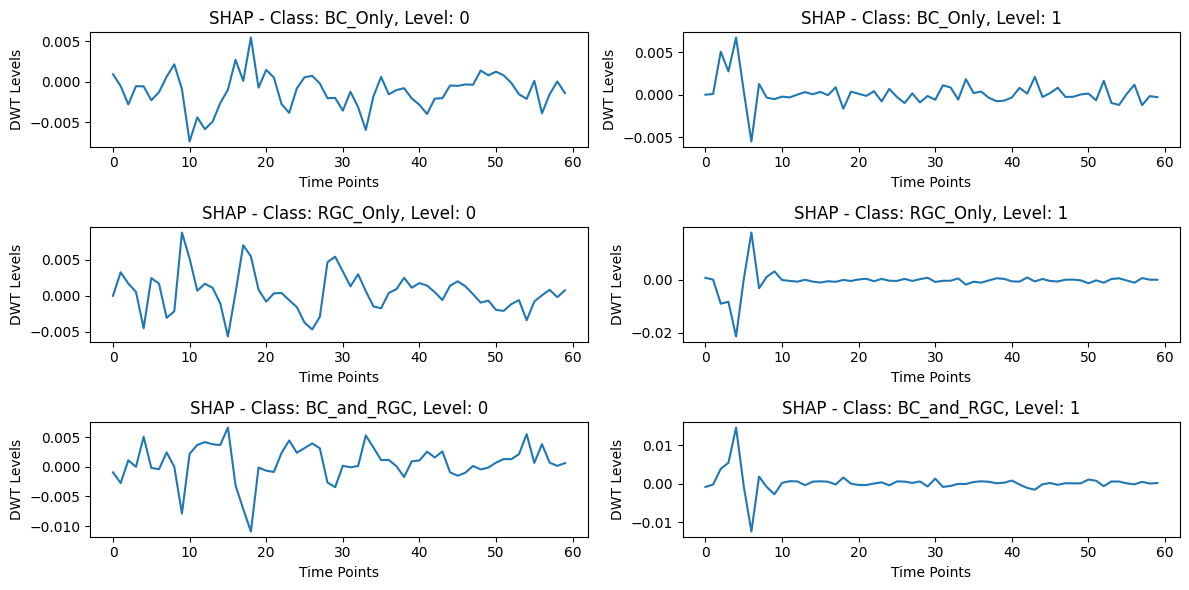

[[ 3 14  1]
 [ 3 15  0]
 [ 0  3 15]]
--- Experiment 10 ---
Training samples: 117, batch size: 11, epochs: 100, n_BC_train: 39, n_RGC_train: 39, n_BC_and_RGC_train: 39
Testing samples: 54, n_BC_test: 18, n_RGC_test: 18, n_BC_and_RGC_test: 18
Model output shape: (None, 3)
    1 |     0.3419 |     0.5741
    2 |     0.6325 |     0.5000
    3 |     0.6923 |     0.4630
    4 |     0.7949 |     0.5926
    5 |     0.7949 |     0.6111
    6 |     0.7778 |     0.4444
    7 |     0.7778 |     0.4259
    8 |     0.8462 |     0.4444
    9 |     0.8034 |     0.4259
   10 |     0.8889 |     0.4074
   11 |     0.8291 |     0.4815
   12 |     0.8889 |     0.4630
   13 |     0.8632 |     0.4259
   14 |     0.8632 |     0.4444
   15 |     0.8291 |     0.4815
   16 |     0.8547 |     0.5000
   17 |     0.8803 |     0.4259
   18 |     0.8632 |     0.4074
   19 |     0.8547 |     0.4259
   20 |     0.8718 |     0.6296
   21 |     0.8632 |     0.6481
   22 |     0.8803 |     0.6481
   23 |     0.9060 |     

/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_126
Received: inputs=['Tensor(shape=(54, 60, 2))']
  warnings.warn(msg)
/Users/lillikiessling/Documents/Stanford/Code/VEP_Classifier/.venv/lib/python3.13/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_126
Received: inputs=['Tensor(shape=(50, 60, 2))']
  warnings.warn(msg)


SHAP values shape: [(60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3), (60, 2, 3)]
Averaged SHAP values shape: (60, 2, 3)


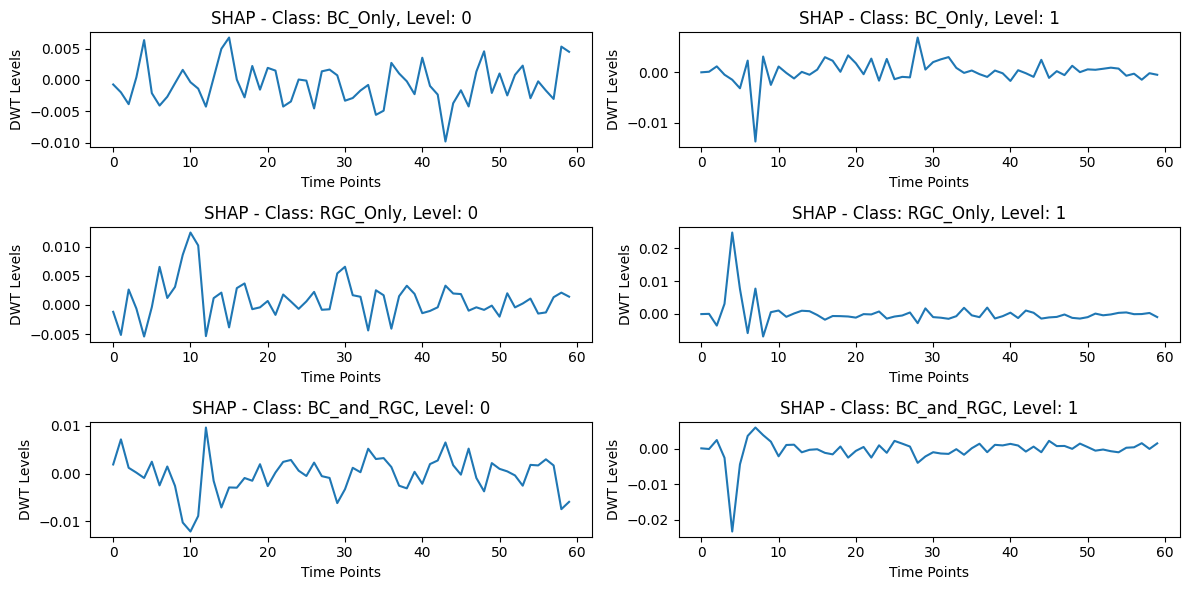

[[ 7  8  3]
 [ 5 13  0]
 [ 0  0 18]]


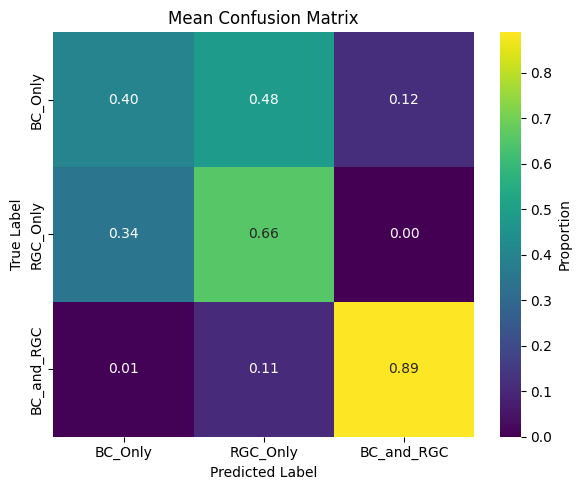

In [ ]:
average_results = {}
results = []
mean_shap_values = []
all_conf_matrices = []
for experiments in range(10):
    print(f"--- Experiment {experiments + 1} ---")
    no_files = min(len(prima_files_BC_only), len(prima_files_RGC_only), len(prima_files_BC_and_RGC))
    sampled_BC_train = np.random.choice(prima_files_BC_only, no_files, replace=False)
    sampled_RGC_train = np.random.choice(prima_files_RGC_only, no_files, replace=False)
    sampled_BC_and_RGC_train = np.random.choice(prima_files_BC_and_RGC, no_files, replace=False)

    no_files_test = min(len(mp20_files_BC_only), len(mp20_files_RGC_only), len(mp20_files_BC_and_RGC))
    BC_test = np.random.choice(mp20_files_BC_only, no_files_test, replace=False)
    RGC_test = np.random.choice(mp20_files_RGC_only, no_files_test, replace=False)
    BC_and_RGC_test = np.random.choice(mp20_files_BC_and_RGC, no_files_test, replace=False)

    # BC_test = mp20_files_BC_only
    # RGC_test = mp20_files_RGC_only
    # BC_and_RGC_test = mp20_files_BC_and_RGC

    X_train, y_train = [], []
    X_test, y_test = [], []
    TMAX = 150
    LEVEL = 4
    WAVELET = 'db6' # ''db4', db6','coif3','sym5','bior4.4'
    for file in sampled_BC_train:
        _, signal = load_preprocessed_signal(file)
        X_train.append(extract_dwt_features(signal, wavelet=WAVELET, level=LEVEL))
        y_train.append("BC_Only")
    for file in sampled_RGC_train:
        _, signal = load_preprocessed_signal(file)
        X_train.append(extract_dwt_features(signal, wavelet=WAVELET, level=LEVEL))
        y_train.append("RGC_Only")
    for file in sampled_BC_and_RGC_train:
        _, signal = load_preprocessed_signal(file)
        X_train.append(extract_dwt_features(signal, wavelet=WAVELET, level=LEVEL))
        y_train.append("BC_and_RGC")
    for file in BC_test:
        _, signal = load_preprocessed_signal(file)
        X_test.append(extract_dwt_features(signal, wavelet=WAVELET, level=LEVEL))
        y_test.append("BC_Only")
    for file in RGC_test:
        _, signal = load_preprocessed_signal(file)
        X_test.append(extract_dwt_features(signal, wavelet=WAVELET, level=LEVEL))
        y_test.append("RGC_Only")
    for file in BC_and_RGC_test:
        _, signal = load_preprocessed_signal(file)
        X_test.append(extract_dwt_features(signal, wavelet=WAVELET, level=LEVEL))
        y_test.append("BC_and_RGC")
    X_train = np.stack(X_train, axis=0)                     # (n_samples, n_levels, n_points)
    X_train = np.transpose(X_train, (0, 2, 1)).astype('float32')  # (n_samples, n_points, n_levels)
    X_test = np.stack(X_test, axis=0)                     # (n_samples, n_levels, n_points)
    X_test = np.transpose(X_test, (0, 2, 1)).astype('float32')  # (n_samples, n_points, n_levels)

    n_train = len(X_train)
    batch_size = max(4, min(32, n_train // 10))
    epochs = 50
    print(f"Training samples: {n_train}, batch size: {batch_size}, epochs: {epochs}, n_BC_train: {len(sampled_BC_train)}, n_RGC_train: {len(sampled_RGC_train)}, n_BC_and_RGC_train: {len(sampled_BC_and_RGC_train)}")
    print(f"Testing samples: {len(X_test)}, n_BC_test: {len(BC_test)}, n_RGC_test: {len(RGC_test)}, n_BC_and_RGC_test: {len(BC_and_RGC_test)}")
    clf = Multichannel_1DCNN()
    y_true, y_pred, shap_values = clf.fit_traintest(epochs=epochs, batch_size=batch_size, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


    print("SHAP values shape:", [sv.shape for sv in shap_values])
    # average over folds
    shap_values = np.mean(shap_values, axis=0) # dimension (200, 4, 3) = (n_points, n_levels, n_classes)
    print("Averaged SHAP values shape:", shap_values.shape) 
    mean_shap_values.append(shap_values)

    plt.figure(figsize=(12, 6))
    class_names = ["BC_Only", "RGC_Only", "BC_and_RGC"]
    for i, class_name in enumerate(class_names):
        for j in range(shap_values.shape[1]):
            plt.subplot(len(class_names), shap_values.shape[1], i * shap_values.shape[1] + j + 1)
            plt.title(f"SHAP - Class: {class_name}, Level: {j}")
            plt.plot(shap_values[:, :, i][:, j])
            plt.xlabel("Time Points")
            plt.ylabel("DWT Levels")
    plt.tight_layout()
    plt.show()

    unique_labels = np.unique(y_true)
    metrics = clf.evaluate(y_true, y_pred)

    results.append({
            "Accuracy": metrics["accuracy"],
            "BalancedAcc": metrics["balanced_accuracy"],
            "F1": metrics["f1_score"],
            "Acc BC_Only": metrics["report"]["BC_Only"]["recall"],
            "Acc RGC_and_BC": metrics["report"]["BC_and_RGC"]["recall"],
            "Acc RGC_Only": metrics["report"]["RGC_Only"]["recall"],
        })
    all_conf_matrices.append(
        confusion_matrix(
            y_true, y_pred, labels=["BC_Only", "RGC_Only", "BC_and_RGC"]
        )
    )

accs = [r["Accuracy"] for r in results]
balanced_accs = [r["BalancedAcc"] for r in results]
f1s = [r["F1"] for r in results]
bc_accs = [float(r["Acc BC_Only"]) for r in results]
rgc_accs = [float(r["Acc RGC_Only"]) for r in results]
bc_rgc_accs = [float(r["Acc RGC_and_BC"]) for r in results]

average_results = {
    "Accuracy_mean": np.mean(accs),
    "Accuracy_std": np.std(accs),
    "BalancedAcc_mean": np.mean(balanced_accs),
    "BalancedAcc_std": np.std(balanced_accs),
    "F1_mean": np.mean(f1s),
    "F1_std": np.std(f1s),

    # per-class accuracies (recall)
    "Acc_BC_Only_mean": np.mean(bc_accs),
    "Acc_BC_Only_std": np.std(bc_accs),
    "Acc_RGC_Only_mean": np.mean(rgc_accs),
    "Acc_RGC_Only_std": np.std(rgc_accs),
    "Acc_BC_and_RGC_mean": np.mean(bc_rgc_accs),
    "Acc_BC_and_RGC_std": np.std(bc_rgc_accs),
}
mean_conf_matrix = np.mean(all_conf_matrices, axis=0)
mean_conf_matrix = mean_conf_matrix / mean_conf_matrix.sum(axis=1, keepdims=True)

labels = ["BC_Only", "RGC_Only", "BC_and_RGC"] 
plt.figure(figsize=(6,5)) 
sns.heatmap(mean_conf_matrix, annot=True, fmt=".2f", cmap="viridis", xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Proportion'}) 
plt.title(f"Mean Confusion Matrix") 
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.tight_layout()
plt.show()

In [ ]:
# get average results
print("Average Results over 10 experiments:")
for k, v in average_results.items():
    print(f"{k}: {v:.4f}")

Average Results over 10 experiments:
Accuracy_mean: 0.6481
Accuracy_std: 0.0497
BalancedAcc_mean: 0.6481
BalancedAcc_std: 0.0497
F1_mean: 0.6364
F1_std: 0.0576
Acc_BC_Only_mean: 0.4000
Acc_BC_Only_std: 0.1528
Acc_RGC_Only_mean: 0.6556
Acc_RGC_Only_std: 0.1133
Acc_BC_and_RGC_mean: 0.8889
Acc_BC_and_RGC_std: 0.0896


In [ ]:
mean_signals_prima = {}
_, avg_signal_prima_BC = compute_average_signal(prima_files_BC_only, t_min=0, t_max=200)
_, avg_signal_prima_RGC = compute_average_signal(prima_files_RGC_only, t_min=0, t_max=200)
_, avg_signal_prima_BC_RGC = compute_average_signal(prima_files_BC_and_RGC, t_min=0, t_max=200)
mean_signals_prima["BC_Only"] = avg_signal_prima_BC
mean_signals_prima["RGC_Only"] = avg_signal_prima_RGC
mean_signals_prima["BC_and_RGC"] = avg_signal_prima_BC_RGC

mean_signals_mp20 = {}
_, avg_signal_mp20_BC = compute_average_signal(mp20_files_BC_only, t_min=0, t_max=200)
_, avg_signal_mp20_RGC = compute_average_signal(mp20_files_RGC_only, t_min=0, t_max=200)
_, avg_signal_mp20_BC_RGC = compute_average_signal(mp20_files_BC_and_RGC, t_min=0, t_max=200)
mean_signals_mp20["BC_Only"] = avg_signal_mp20_BC
mean_signals_mp20["RGC_Only"] = avg_signal_mp20_RGC
mean_signals_mp20["BC_and_RGC"] = avg_signal_mp20_BC_RGC

mean_dwt_features_prima = {} 
mean_dwt_features_prima["BC_Only"] = extract_dwt_features(avg_signal_prima_BC, wavelet='db4', level=4) 
mean_dwt_features_prima["RGC_Only"] = extract_dwt_features(avg_signal_prima_RGC, wavelet='db4', level=4) 
mean_dwt_features_prima["BC_and_RGC"] = extract_dwt_features(avg_signal_prima_BC_RGC, wavelet='db4', level=4) 

mean_dwt_features_mp20 = {}
mean_dwt_features_mp20["BC_Only"] = extract_dwt_features(avg_signal_mp20_BC, wavelet='db4', level=4)
mean_dwt_features_mp20["RGC_Only"] = extract_dwt_features(avg_signal_mp20_RGC, wavelet='db4', level=4)
mean_dwt_features_mp20["BC_and_RGC"] = extract_dwt_features(avg_signal_mp20_BC_RGC, wavelet='db4', level=4)

Global mean SHAP shape: (47, 2, 3)
SHAP thresholds per class at 98 percentile: [0.00806053 0.01163893 0.00670621]


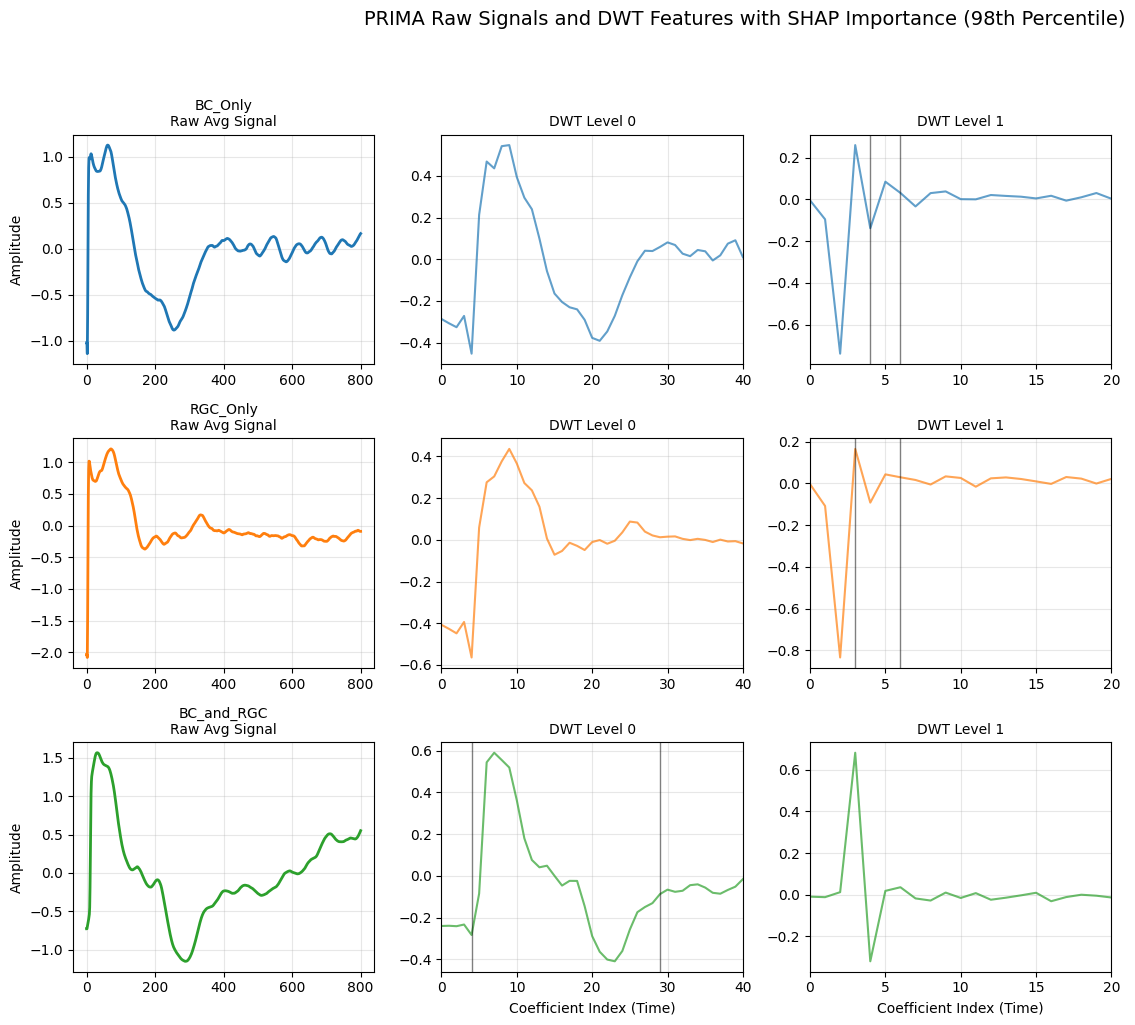

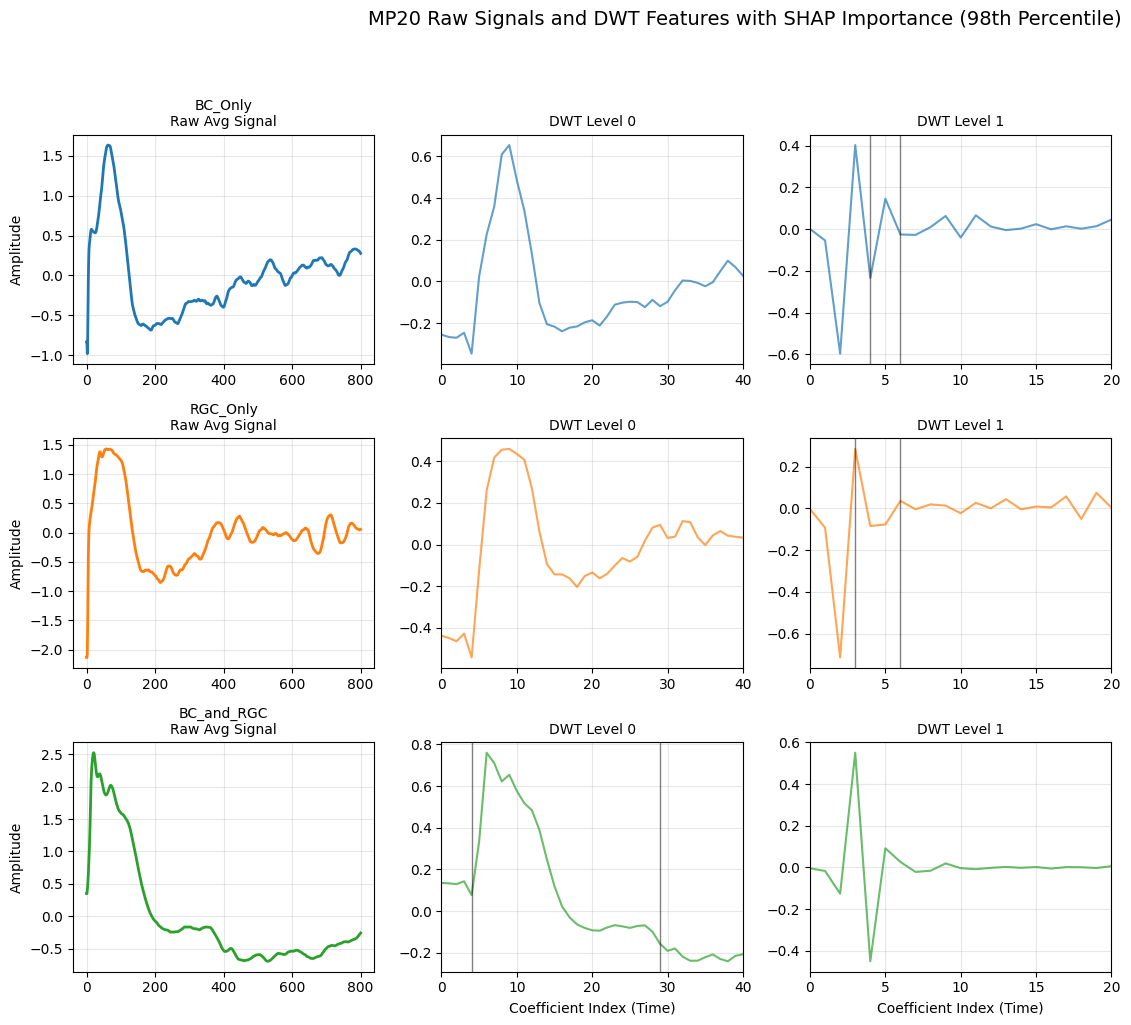

In [ ]:
N_LEVELS = 3
ABS_SHAP_THRESHOLD_PERCENTILE = 98
# Average SHAP values across all experiments 
mean_shap_values_global = np.mean(np.stack(mean_shap_values, axis=0), axis=0) # shape (n_points, n_levels, n_classes) 
print("Global mean SHAP shape:", mean_shap_values_global.shape) 
# find 98th percentile threshold for each class
shap_thresholds = np.percentile(np.abs(mean_shap_values_global), ABS_SHAP_THRESHOLD_PERCENTILE, axis=(0, 1))
print("SHAP thresholds per class at", ABS_SHAP_THRESHOLD_PERCENTILE, "percentile:", shap_thresholds)

plot_mean_signals_and_dwt(
    mean_signals_prima, 
    mean_dwt_features_prima, 
    mean_shap_values_global, 
    shap_thresholds, 
    dataset_name="PRIMA", 
    N_LEVELS=N_LEVELS, 
    ABS_SHAP_THRESHOLD_PERCENTILE=ABS_SHAP_THRESHOLD_PERCENTILE
)

plot_mean_signals_and_dwt(
    mean_signals_mp20, 
    mean_dwt_features_mp20, 
    mean_shap_values_global, 
    shap_thresholds, 
    dataset_name="MP20", 
    N_LEVELS=N_LEVELS, 
    ABS_SHAP_THRESHOLD_PERCENTILE=ABS_SHAP_THRESHOLD_PERCENTILE
)